#                                        Data Analysis Final Project 

##                                               Team: Transistor Titans

###                         Zala Marušič & Volkan Soenmezler

## 1: Data Set (10 points)


##  2.1 Data Preprocessing and Basic Analysis 
 • Basic statistical analysis using pandas (10 points)
 
 • Original data quality analysis (including visualization) (20 points)

 • Data preprocessing (20 points)
 
 • Preprocessed vs original data visual analysis (10 points)

Importing libraries:

In [1]:
# Importing necessary libraries
import pandas as pd       # For data manipulation and analysis
import numpy as np        # For numerical operations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns     # For advanced visualizations
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

### 2.1.1 Basic statistical analysis using pandas

In [2]:
# Load the CSV file
file_path = "train_FD001.txt" 
columns = ['engine_id', 'cycle','op1', 'op2', 'op3'] + [f's{i}' for i in range(1, 22)]

data = pd.read_csv(file_path, sep=r'\s+', header=None)
data.columns = columns

print("First few rows of the dataset:")
data.head(20)

First few rows of the dataset:


engine_id  cycle     op1     op2    op3      s1      s2       s3       s4  \
0           1      1 -0.0007 -0.0004  100.0  518.67  641.82  1589.70  1400.60   
1           1      2  0.0019 -0.0003  100.0  518.67  642.15  1591.82  1403.14   
2           1      3 -0.0043  0.0003  100.0  518.67  642.35  1587.99  1404.20   
3           1      4  0.0007  0.0000  100.0  518.67  642.35  1582.79  1401.87   
4           1      5 -0.0019 -0.0002  100.0  518.67  642.37  1582.85  1406.22   
5           1      6 -0.0043 -0.0001  100.0  518.67  642.10  1584.47  1398.37   
6           1      7  0.0010  0.0001  100.0  518.67  642.48  1592.32  1397.77   
7           1      8 -0.0034  0.0003  100.0  518.67  642.56  1582.96  1400.97   
8           1      9  0.0008  0.0001  100.0  518.67  642.12  1590.98  1394.80   
9           1     10 -0.0033  0.0001  100.0  518.67  641.71  1591.24  1400.46   
10          1     11  0.0018 -0.0003  100.0  518.67  642.28  1581.75  1400.64   
11          1     12  0.0016  0.0002  100.0  518.67  642.06  1583.41  1400.15   
12          1     13 -0.0019  0.0004  100.0  518.67  643.07  1582.19  1400.83   
13          1     14  0.0009 -0.0000  100.0  518.67  642.35  1592.95  1399.16   
14          1     15 -0.0018 -0.0003  100.0  518.67  642.43  1583.82  1402.13   
15          1     16  0.0006  0.0005  100.0  518.67  642.13  1587.98  1404.50   
16          1     17  0.0002  0.0002  100.0  518.67  642.58  1584.96  1399.95   
17          1     18 -0.0031 -0.0001  100.0  518.67  642.62  1591.04  1396.12   
18          1     19  0.0032 -0.0003  100.0  518.67  641.79  1587.56  1400.35   
19          1     20 -0.0037  0.0001  100.0  518.67  643.04  1581.11  1405.23   

       s5  ...     s12      s13      s14     s15   s16  s17   s18    s19  \
0   14.62  ...  521.66  2388.02  8138.62  8.4195  0.03  392  2388  100.0   
1   14.62  ...  522.28  2388.07  8131.49  8.4318  0.03  392  2388  100.0   
2   14.62  ...  522.42  2388.03  8133.23  8.4178  0.03  390  2388  100.0   
3   14.62  ...  522.86  2388.08  8133.83  8.3682  0.03  392  2388  100.0   
4   14.62  ...  522.19  2388.04  8133.80  8.4294  0.03  393  2388  100.0   
5   14.62  ...  521.68  2388.03  8132.85  8.4108  0.03  391  2388  100.0   
6   14.62  ...  522.32  2388.03  8132.32  8.3974  0.03  392  2388  100.0   
7   14.62  ...  522.47  2388.03  8131.07  8.4076  0.03  391  2388  100.0   
8   14.62  ...  521.79  2388.05  8125.69  8.3728  0.03  392  2388  100.0   
9   14.62  ...  521.79  2388.06  8129.38  8.4286  0.03  393  2388  100.0   
10  14.62  ...  521.40  2388.01  8140.58  8.4340  0.03  392  2388  100.0   
11  14.62  ...  521.80  2388.02  8134.25  8.3938  0.03  391  2388  100.0   
12  14.62  ...  521.85  2388.08  8128.10  8.4152  0.03  393  2388  100.0   
13  14.62  ...  521.67  2388.00  8134.43  8.3964  0.03  393  2388  100.0   
14  14.62  ...  522.50  2388.08  8127.56  8.4199  0.03  391  2388  100.0   
15  14.62  ...  521.49  2388.07  8136.11  8.3936  0.03  392  2388  100.0   
16  14.62  ...  521.89  2388.04  8137.27  8.4542  0.03  392  2388  100.0   
17  14.62  ...  521.76  2388.07  8132.73  8.4028  0.03  392  2388  100.0   
18  14.62  ...  521.89  2388.03  8129.13  8.4321  0.03  391  2388  100.0   
19  14.62  ...  522.07  2388.02  8129.71  8.4210  0.03  392  2388  100.0   

      s20      s21  
0   39.06  23.4190  
1   39.00  23.4236  
2   38.95  23.3442  
3   38.88  23.3739  
4   38.90  23.4044  
5   38.98  23.3669  
6   39.10  23.3774  
7   38.97  23.3106  
8   39.05  23.4066  
9   38.95  23.4694  
10  38.94  23.4787  
11  39.06  23.3660  
12  38.93  23.2757  
13  39.18  23.3826  
14  38.99  23.3500  
15  38.97  23.4550  
16  38.81  23.3319  
17  38.89  23.3987  
18  38.80  23.3464  
19  39.03  23.4220  

[20 rows x 26 columns]

Computing remaining useful life:

In [3]:
# -------------------------------
# Compute RUL for training dataset
# -------------------------------

# RUL = max cycle per engine - current cycle
data['RUL'] = data.groupby('engine_id')['cycle'].transform('max') - data['cycle']

# Verify
print("Dataset with calculated RUL:")
print(data[['engine_id', 'cycle', 'RUL']].head(10))


Dataset with calculated RUL:
   engine_id  cycle  RUL
0          1      1  191
1          1      2  190
2          1      3  189
3          1      4  188
4          1      5  187
5          1      6  186
6          1      7  185
7          1      8  184
8          1      9  183
9          1     10  182


In [4]:
# Basic Statistical Analysis
basic_stats = data['cycle'].describe()
# Displaying the basic statistics
print("Basic Statistics of Cycle:")
basic_stats

Basic Statistics of Cycle:


count    20631.000000
mean       108.807862
std         68.880990
min          1.000000
25%         52.000000
50%        104.000000
75%        156.000000
max        362.000000
Name: cycle, dtype: float64

### 2.1.2 Original data quality analysis (including visualization)

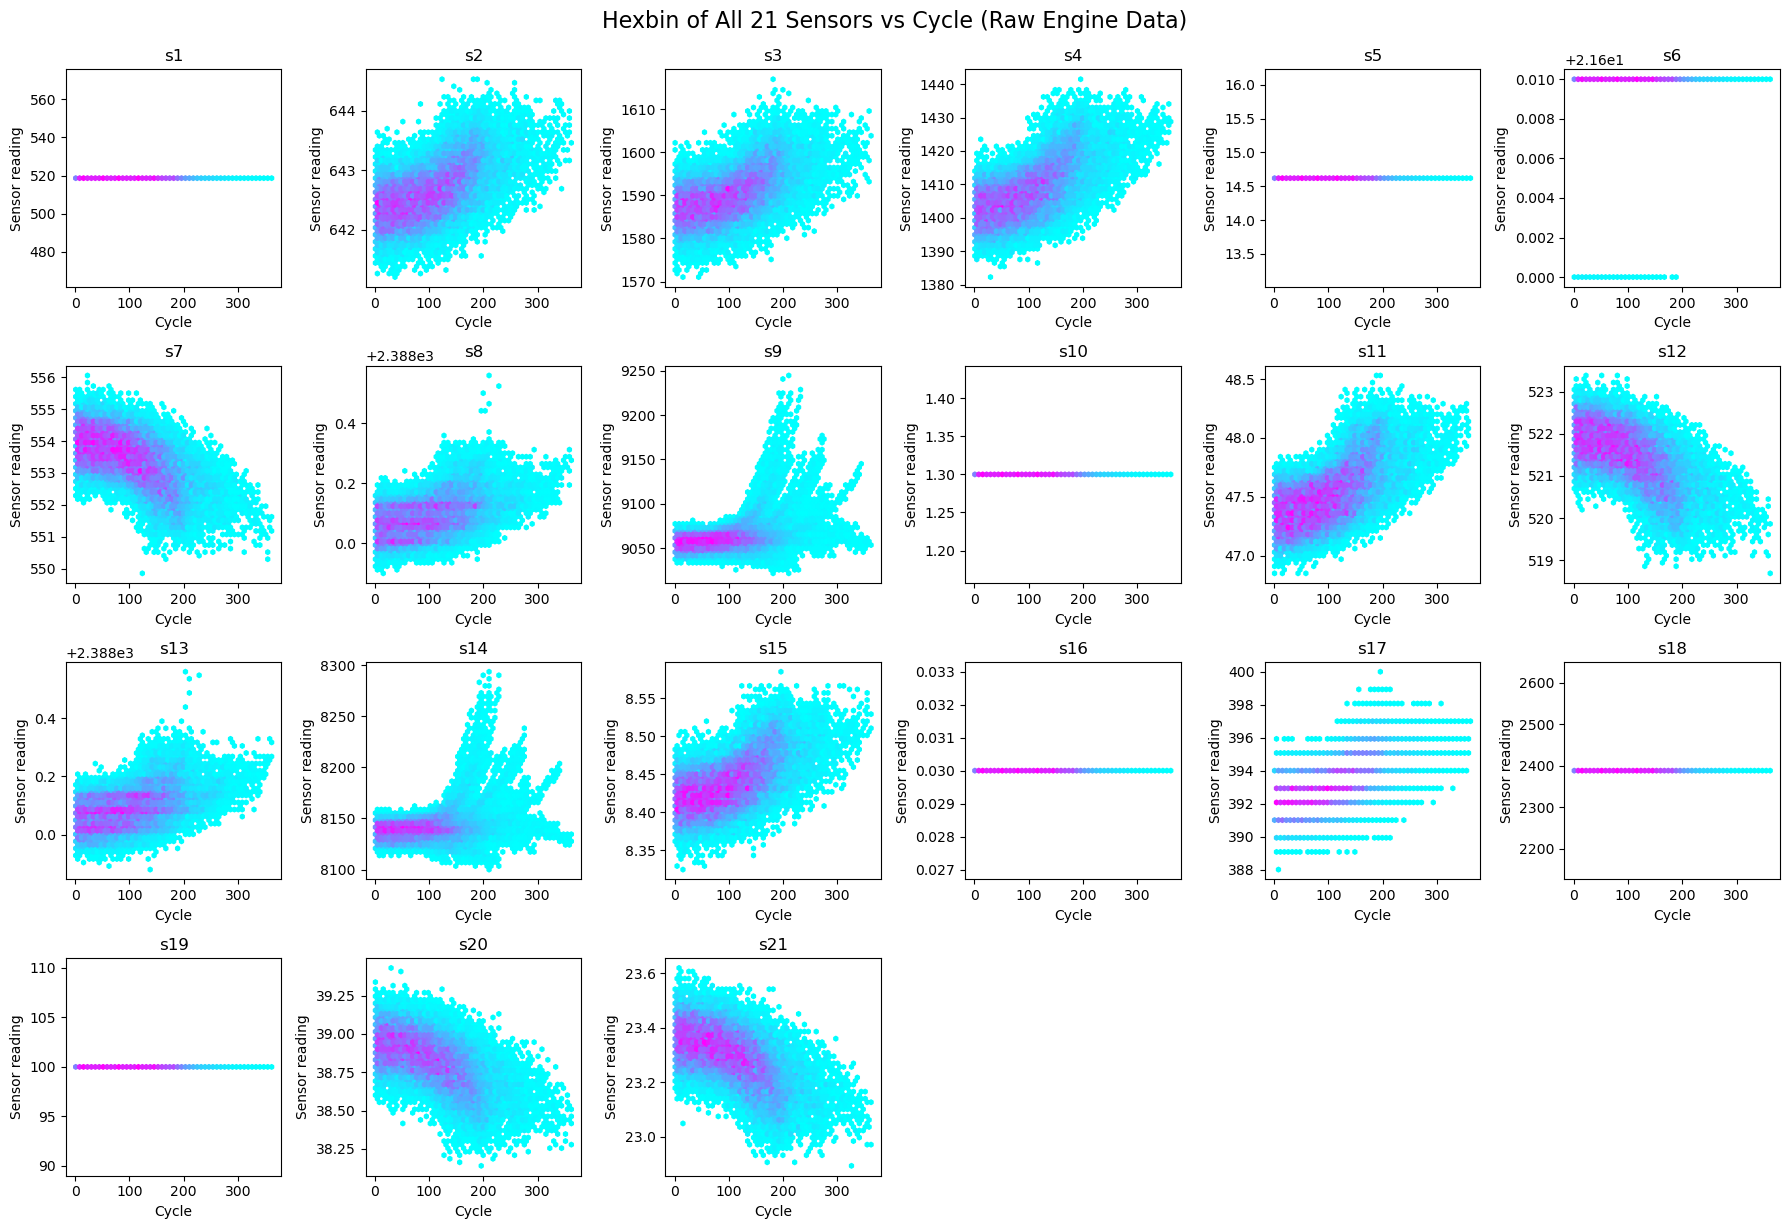

In [5]:
# -------------------------------
# BEFORE CLEANING: HEXBIN PLOTS OF ALL 21 SENSORS
# -------------------------------

sensors_to_plot = [f's{i}' for i in range(1, 22)]  # all 21 sensors

plt.figure(figsize=(18, 12))

for i, sensor in enumerate(sensors_to_plot, 1):
    plt.subplot(4, 6, i)  # 4 rows x 6 columns (last plot empty)
    plt.hexbin(
        data['cycle'], 
        data[sensor], 
        gridsize=50, 
        cmap='cool', 
        mincnt=1
    )
    plt.title(sensor)
    plt.xlabel("Cycle")
    plt.ylabel("Sensor reading")

plt.tight_layout()
plt.suptitle("Hexbin of All 21 Sensors vs Cycle (Raw Engine Data)", fontsize=16, y=1.02)
plt.show()


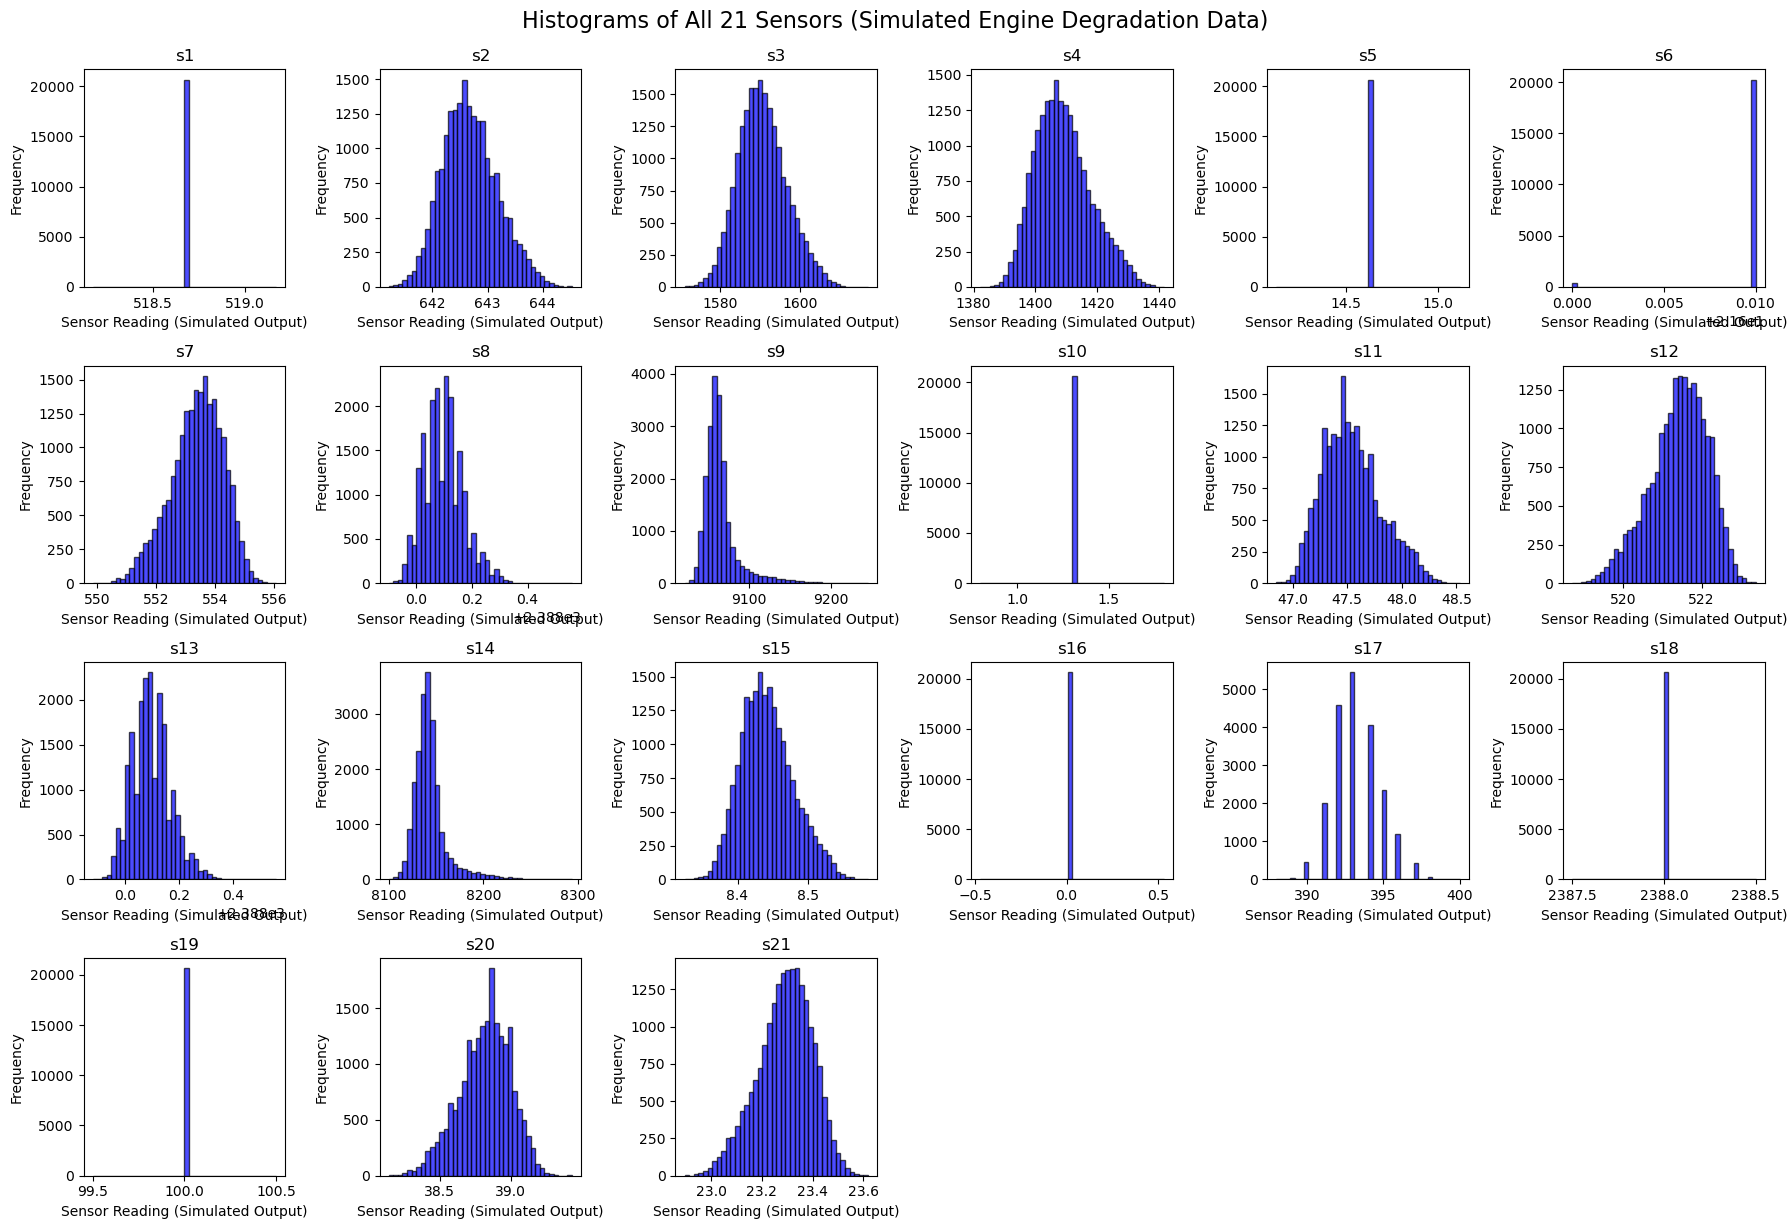

In [6]:
# -------------------------------
# Histograms of all 21 sensors
# -------------------------------

sensors_to_plot = [f's{i}' for i in range(1, 22)]  # all 21 sensors

plt.figure(figsize=(18, 12))

for i, sensor in enumerate(sensors_to_plot, 1):
    plt.subplot(4, 6, i)  # 4 rows x 6 columns grid (last plot empty)
    plt.hist(data[sensor], bins=40, color='blue', edgecolor='black', alpha=0.7)
    plt.title(sensor)
    plt.xlabel("Sensor Reading (Simulated Output)")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.suptitle("Histograms of All 21 Sensors (Simulated Engine Degradation Data)", fontsize=16, y=1.02)
plt.show()


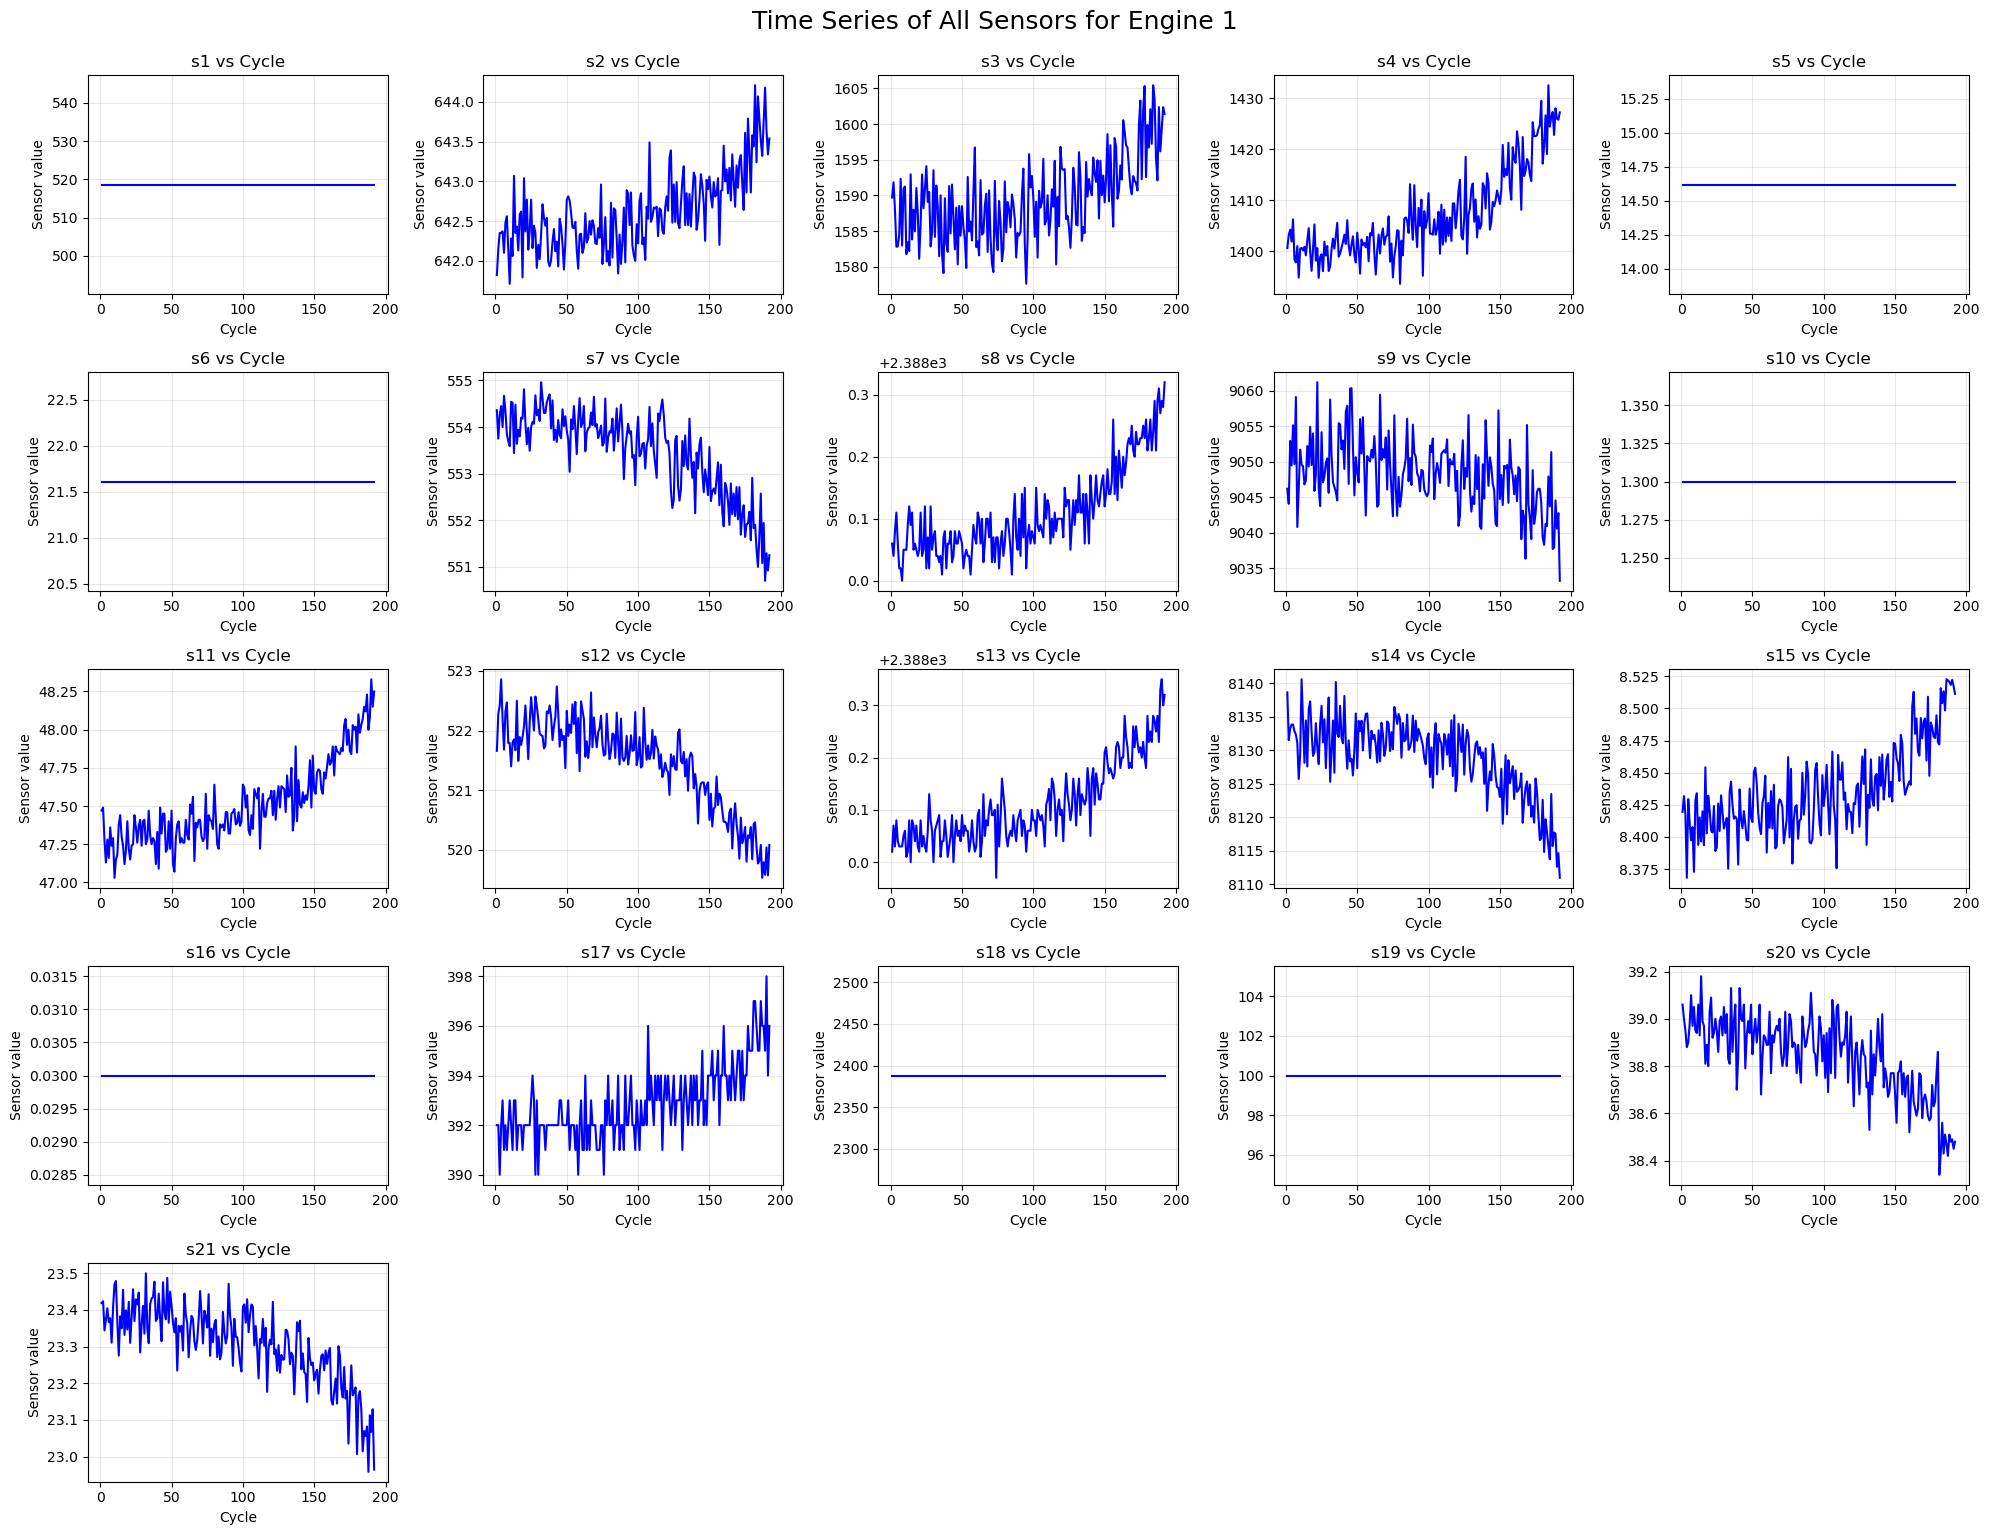

In [7]:
# -------------------------------
# BEFORE CLEANING: Time Series of All Sensors
# -------------------------------

engine_example = 1  # select one engine
engine_data = data[data['engine_id'] == engine_example]

sensors_to_plot = [f's{i}' for i in range(1, 22)]  # all sensors

plt.figure(figsize=(20, 15))

for i, sensor in enumerate(sensors_to_plot, 1):
    plt.subplot(5, 5, i)  # 5 rows x 5 cols grid (last 4 empty)
    plt.plot(engine_data['cycle'], engine_data[sensor], color='blue')
    plt.title(f"{sensor} vs Cycle")
    plt.xlabel("Cycle")
    plt.ylabel("Sensor value")
    plt.grid(alpha=0.3)

plt.tight_layout()
plt.suptitle(f"Time Series of All Sensors for Engine {engine_example}", fontsize=18, y=1.02)
plt.show()


The sensor variables were grouped into quantities based on similarities in their numerical ranges and variance. Sensors within each group were averaged to reduce redundancy while preserving the underlying operational trends. A total of ten groups was formed, corresponding to the natural partitioning of the sensors into ten range-based clusters.

No missing values is expected

- Sensors (s1–s21) and operating settings (op1–op3) are fully recorded for all cycles.
- engine_id and cycle are complete identifiers, so no missing rows there.
- RUL was calculated for all rows (using max cycle - current cycle), so it also has no missing values.

Number of duplicate rows: 0
Missing values per column:
engine_id    0
cycle        0
op1          0
op2          0
op3          0
s1           0
s2           0
s3           0
s4           0
s5           0
s6           0
s7           0
s8           0
s9           0
s10          0
s11          0
s12          0
s13          0
s14          0
s15          0
s16          0
s17          0
s18          0
s19          0
s20          0
s21          0
RUL          0
dtype: int64


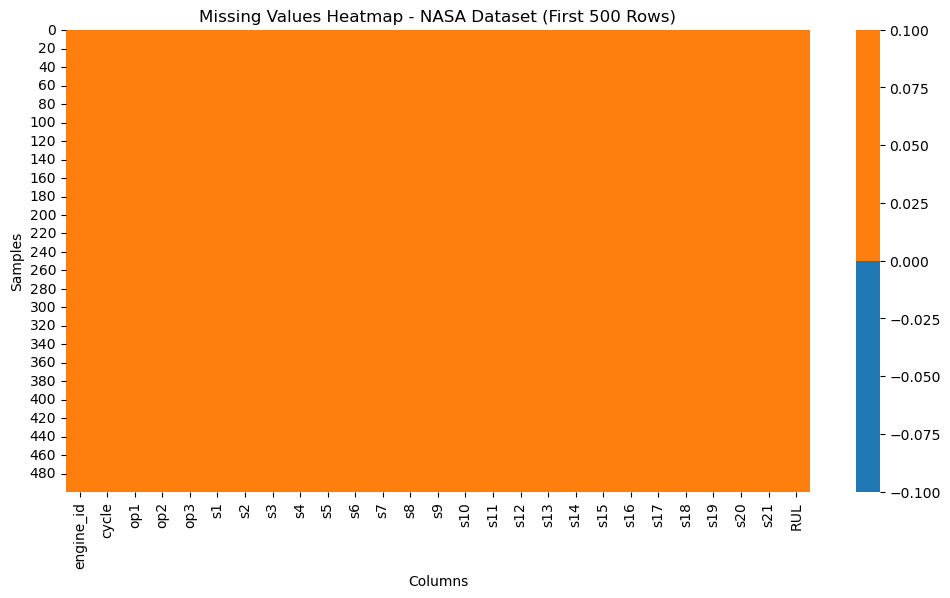

In [8]:
# Checking for duplicates and missing values
duplicates = data.duplicated().sum()
missing_values = data.isna().sum()

print(f"Number of duplicate rows: {duplicates}")
print("Missing values per column:")
print(missing_values)

# -------------------------------
# Missing Values Heatmap 
# -------------------------------
plt.figure(figsize=(12, 6))

sns.heatmap(
    data.iloc[:500].isnull(),               # Only first 500 rows
    cbar=True,
    cmap=sns.color_palette(["#1f77b4", "#ff7f0e"]),  # Blue = present, Orange = missing
    yticklabels=20                             # Show every 20th row for readability
)

plt.title("Missing Values Heatmap - NASA Dataset (First 500 Rows)")
plt.xlabel("Columns")
plt.ylabel("Samples")
plt.show()



### 2.1.3 Data preprocessing



Grouping the readings into 10 columns:


In [9]:
# Select only sensor columns
sensor_cols = [f's{i}' for i in range(1, 22)]
data_sensors = data[sensor_cols]

# Start from the original columns we want to keep
data_quantities = data[['engine_id', 'cycle', 'RUL']].copy()

# Add merged quantity columns q1–q10
data_quantities['q1'] = data_sensors[['s1','s2']].mean(axis=1)
data_quantities['q2'] = data_sensors[['s3','s4']].mean(axis=1)
data_quantities['q3'] = data_sensors[['s5','s6']].mean(axis=1)
data_quantities['q4'] = data_sensors[['s7','s12']].mean(axis=1)
data_quantities['q5'] = data_sensors[['s8','s13','s18']].mean(axis=1)
data_quantities['q6'] = data_sensors[['s9','s14']].mean(axis=1)
data_quantities['q7'] = data_sensors[['s10','s11']].mean(axis=1)
data_quantities['q8'] = data_sensors[['s15','s16']].mean(axis=1)
data_quantities['q9'] = data_sensors[['s17','s18']].mean(axis=1)
data_quantities['q10'] = data_sensors[['s19','s20','s21']].mean(axis=1)

print("Merged sensor quantities (q1-q10) with RUL:")
data_quantities.head(20)


Merged sensor quantities (q1-q10) with RUL:


engine_id  cycle  RUL       q1        q2      q3       q4           q5  \
0           1      1  191  580.245  1495.150  18.115  538.010  2388.026667   
1           1      2  190  580.410  1497.480  18.115  538.015  2388.036667   
2           1      3  189  580.510  1496.095  18.115  538.340  2388.036667   
3           1      4  188  580.510  1492.330  18.115  538.655  2388.063333   
4           1      5  187  580.520  1494.535  18.115  538.095  2388.033333   
5           1      6  186  580.385  1491.420  18.115  538.175  2388.016667   
6           1      7  185  580.575  1495.045  18.115  538.330  2388.016667   
7           1      8  184  580.615  1491.965  18.115  538.160  2388.010000   
8           1      9  183  580.395  1492.890  18.115  537.740  2388.033333   
9           1     10  182  580.190  1495.850  18.115  537.690  2388.036667   
10          1     11  181  580.475  1491.195  18.115  537.970  2388.020000   
11          1     12  180  580.365  1491.780  18.115  538.160  2388.036667   
12          1     13  179  580.870  1491.510  18.115  537.645  2388.066667   
13          1     14  178  580.510  1496.055  18.115  538.075  2388.030000   
14          1     15  177  580.550  1492.975  18.115  538.070  2388.063333   
15          1     16  176  580.400  1496.240  18.115  537.715  2388.040000   
16          1     17  175  580.625  1492.455  18.115  537.845  2388.033333   
17          1     18  174  580.645  1493.580  18.115  537.980  2388.040000   
18          1     19  173  580.230  1493.955  18.115  538.035  2388.023333   
19          1     20  172  580.855  1493.170  18.115  538.440  2388.023333   

          q6      q7       q8      q9        q10  
0   8592.405  24.385  4.22475  1390.0  54.159667  
1   8587.780  24.395  4.23090  1390.0  54.141200  
2   8593.085  24.285  4.22390  1389.0  54.098067  
3   8591.655  24.215  4.19910  1390.0  54.084633  
4   8594.475  24.290  4.22970  1390.5  54.101467  
5   8591.265  24.230  4.22040  1389.5  54.115633  
6   8595.725  24.330  4.21370  1390.0  54.159133  
7   8585.935  24.270  4.21880  1389.5  54.093533  
8   8586.075  24.295  4.20140  1390.0  54.152200  
9   8590.540  24.165  4.22930  1390.5  54.139800  
10  8595.095  24.225  4.23200  1390.0  54.139567  
11  8591.810  24.240  4.21190  1389.5  54.142000  
12  8587.460  24.340  4.22260  1390.5  54.068567  
13  8590.900  24.370  4.21320  1390.5  54.187533  
14  8589.890  24.300  4.22495  1389.5  54.113333  
15  8592.725  24.270  4.21180  1390.0  54.141667  
16  8596.095  24.210  4.24210  1390.0  54.047300  
17  8591.140  24.255  4.21640  1390.0  54.096233  
18  8591.560  24.350  4.23105  1389.5  54.048800  
19  8587.805  24.260  4.22550  1390.0  54.150667

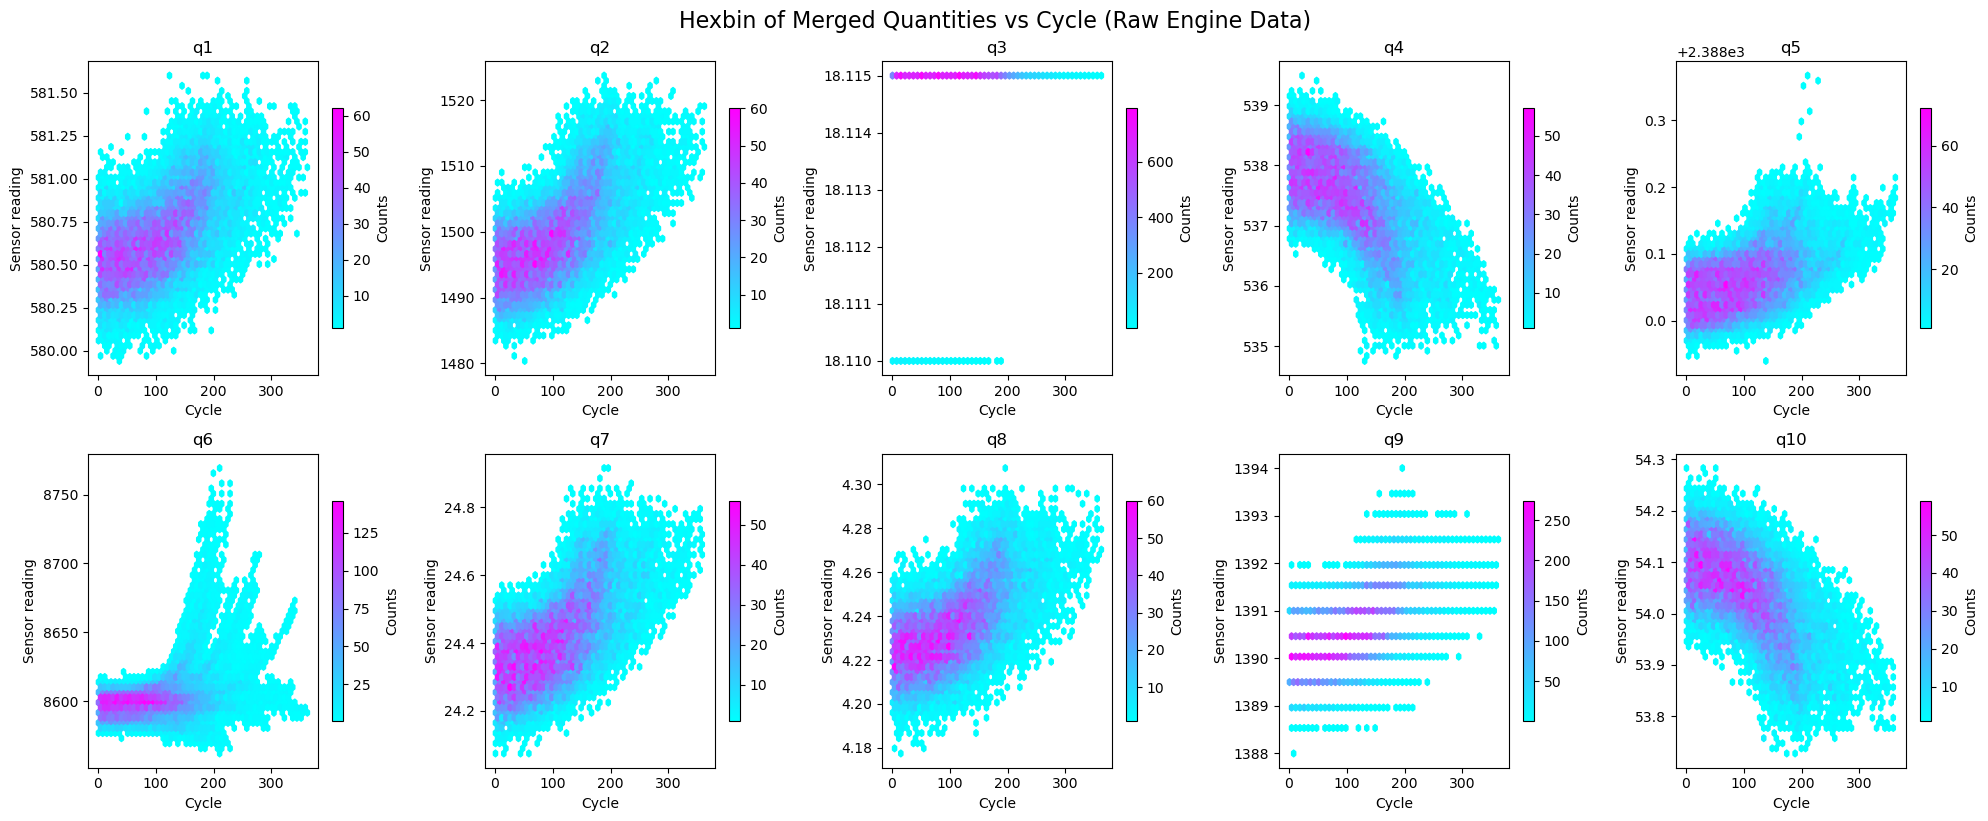

In [10]:
# -------------------------------
# QUANTITIES: HEXBIN PLOTS
# -------------------------------

q_to_plot = [f'q{i}' for i in range(1, 11)]  # all 10 quantities

plt.figure(figsize=(20, 8))

for i, q in enumerate(q_to_plot, 1):
    plt.subplot(2, 5, i)  # 2 rows x 5 columns
    plt.hexbin(
        data['cycle'], 
        data_quantities[q], 
        gridsize=50, 
        cmap='cool', 
        mincnt=1
    )
    plt.title(q)
    plt.xlabel("Cycle")
    plt.ylabel("Sensor reading")
    plt.colorbar(label='Counts', shrink=0.7)

plt.tight_layout()
plt.suptitle("Hexbin of Merged Quantities vs Cycle (Raw Engine Data)", fontsize=16, y=1.02)
plt.show()


Quantity q5 was treated separately during preprocessing because it was the only quantity exhibiting clear outliers. Visual inspection of its distribution shows that extreme values start to appear beyond 0.25 above the nominal range, whereas the other quantities do not display comparable outlier behavior. Therefore, a threshold of 2388 + 0.25 was applied to q5 to remove anomalous values while leaving the remaining quantities unchanged.

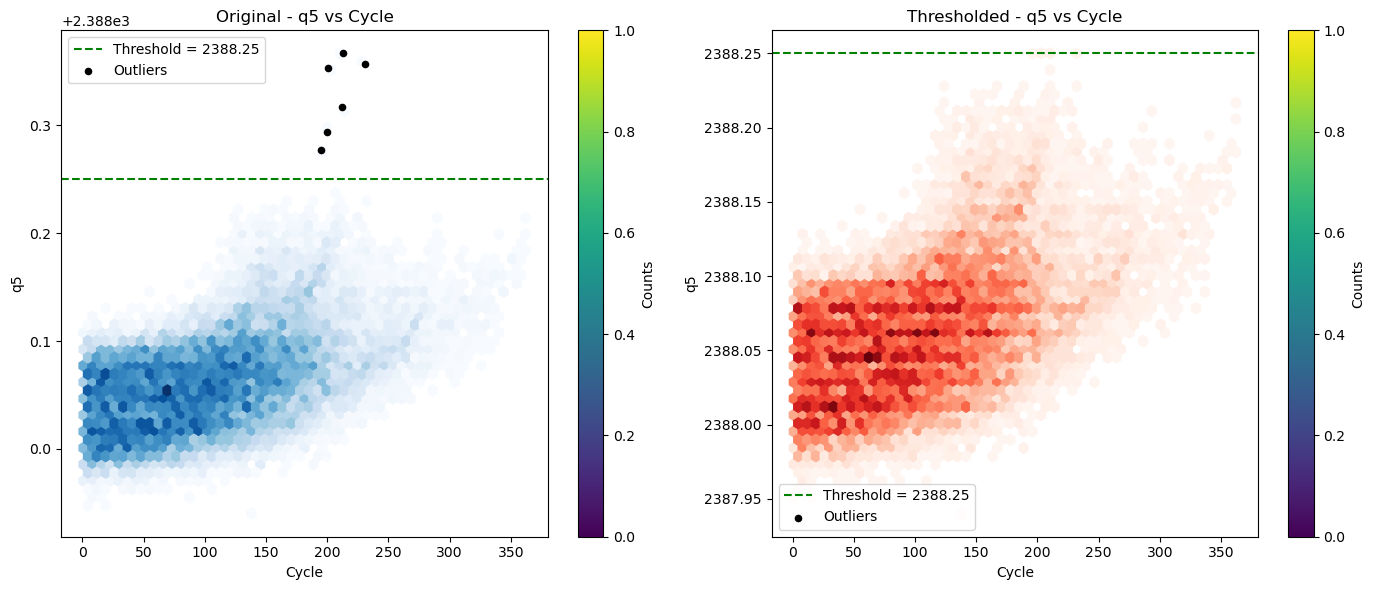

In [11]:
# -------------------------------
# DATA CLEANED: Apply Threshold to q5 and RUL Outlier Removal
# -------------------------------

# Copy all columns from data_quantities
data_cleaned = data_quantities.copy()

# Apply threshold to q5: clip values above 2388 + 0.25
q5_threshold = 2388 + 0.25
data_cleaned['q5'] = data_cleaned['q5'].clip(upper=q5_threshold)

# Remove outliers from RUL using 1st–99th percentile
rul_lower = data_cleaned['RUL'].quantile(0.01)
rul_upper = data_cleaned['RUL'].quantile(0.99)
data_cleaned['RUL'] = data_cleaned['RUL'].clip(lower=rul_lower, upper=rul_upper)

# -------------------------------
# HEXBIN: q5 vs Cycle (Original vs Thresholded) with Outliers
# -------------------------------

q5_threshold = 2388 + 0.25
column = 'q5'

plt.figure(figsize=(14, 6))

# Original data
plt.subplot(1, 2, 1)
plt.hexbin(
    data_quantities['cycle'],
    data_quantities[column],
    gridsize=50,
    cmap='Blues',
    mincnt=1
)
# Threshold line
plt.axhline(q5_threshold, color='green', linestyle='--', label=f"Threshold = {q5_threshold}")
# Outliers above threshold
outliers_orig = data_quantities[data_quantities[column] > q5_threshold]
plt.scatter(
    outliers_orig['cycle'], 
    outliers_orig[column], 
    color='black', 
    s=20, 
    label='Outliers'
)
plt.title(f"Original - {column} vs Cycle")
plt.xlabel("Cycle")
plt.ylabel(column)
plt.colorbar(label="Counts")
plt.legend()

# Cleaned data
plt.subplot(1, 2, 2)
plt.hexbin(
    data_cleaned['cycle'],
    data_cleaned[column],
    gridsize=50,
    cmap='Reds',
    mincnt=1
)
plt.axhline(q5_threshold, color='green', linestyle='--', label=f"Threshold = {q5_threshold}")
# Outliers above threshold in cleaned data (should be none)
outliers_clean = data_cleaned[data_cleaned[column] > q5_threshold]
plt.scatter(
    outliers_clean['cycle'], 
    outliers_clean[column], 
    color='black', 
    s=20, 
    label='Outliers'
)
plt.title(f"Thresholded - {column} vs Cycle")
plt.xlabel("Cycle")
plt.ylabel(column)
plt.colorbar(label="Counts")
plt.legend()

plt.tight_layout()
plt.show()



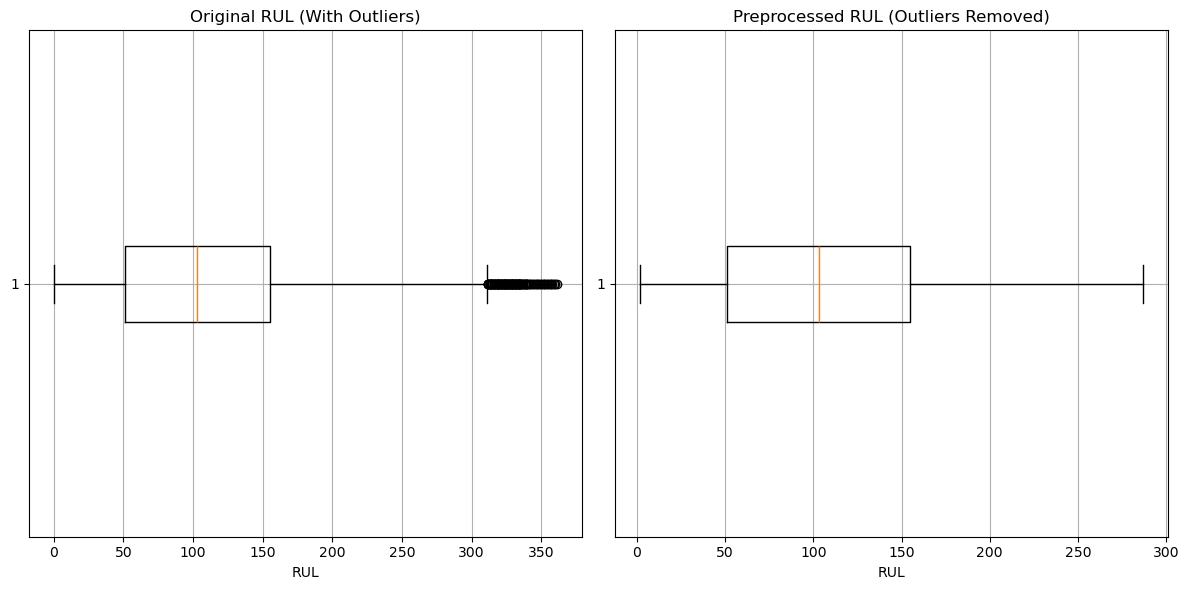

In [12]:
# -------------------------------
# BOXPLOT: Original vs Preprocessed RUL
# -------------------------------

plt.figure(figsize=(12, 6))

# Original RUL boxplot
plt.subplot(1, 2, 1)
plt.boxplot(data['RUL'], vert=False)
plt.title("Original RUL (With Outliers)")
plt.xlabel("RUL")
plt.grid(True)

# Preprocessed RUL boxplot (from data_cleaned)
plt.subplot(1, 2, 2)
plt.boxplot(data_cleaned['RUL'], vert=False)
plt.title("Preprocessed RUL (Outliers Removed)")
plt.xlabel("RUL")
plt.grid(True)

plt.tight_layout()
plt.show()


## 2.2 Visualization and Exploratory Analysis
 •Time series visualizations (10 points)
 
 • Distribution analysis with histograms (10 points)
 
 • Correlation analysis and heatmaps (10 points)
 
 • Daily pattern analysis (15 points)
 
 • Summary of observed patterns- similar to True/False questions (10 points)

### 2.2.1 Time series visualizations
Plot trends, seasonality, or patterns in the time-series data.

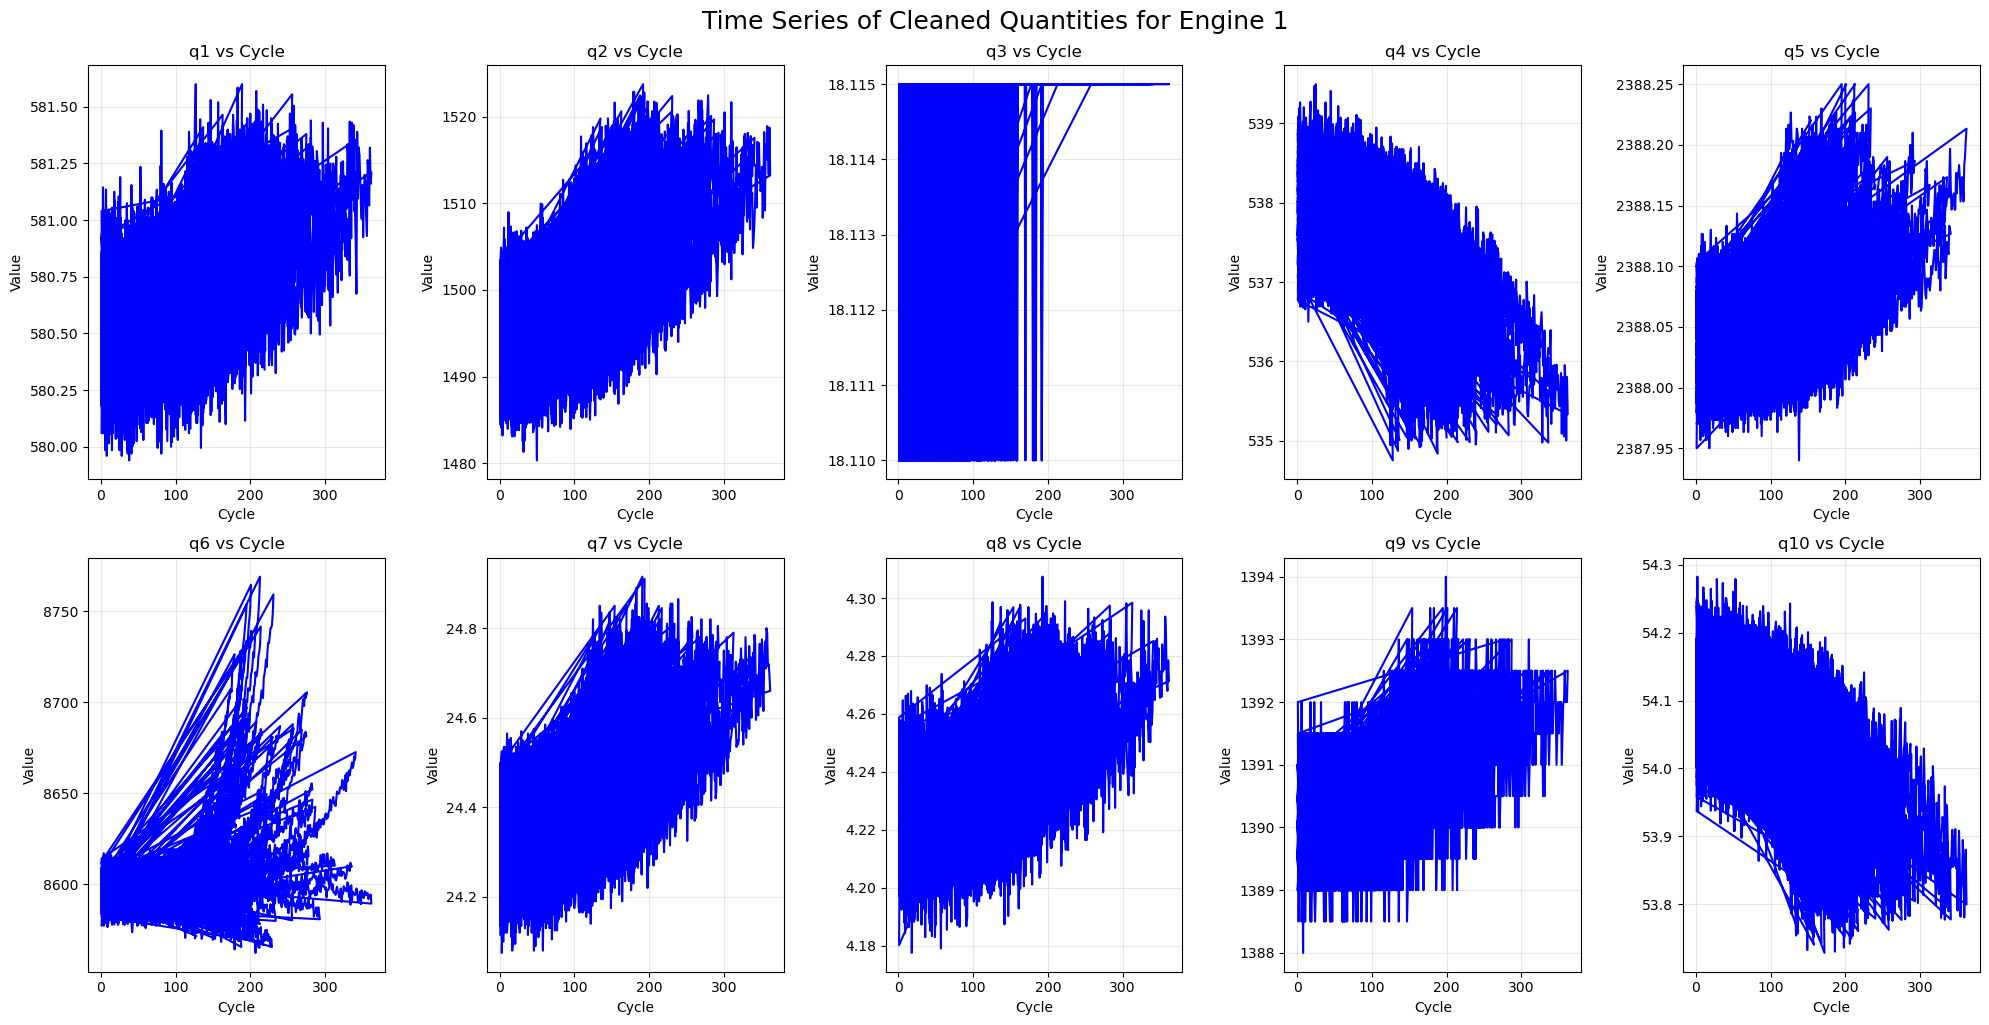

In [13]:
# -------------------------------
# DATA CLEANED: Time Series of All Quantities
# -------------------------------

engine_example = 1  # select one engine

# Use the cleaned quantities
engine_data_q = data_cleaned.copy()
engine_data_q['cycle'] = data['cycle']  # add cycle for x-axis

quantities_to_plot = [f'q{i}' for i in range(1, 11)]  # q1 - q10

plt.figure(figsize=(20, 10))

for i, q in enumerate(quantities_to_plot, 1):
    plt.subplot(2, 5, i)  # 2 rows x 5 columns
    plt.plot(engine_data_q['cycle'], engine_data_q[q], color='blue')
    plt.title(f"{q} vs Cycle")
    plt.xlabel("Cycle")
    plt.ylabel("Value")
    plt.grid(alpha=0.3)

plt.tight_layout()
plt.suptitle(f"Time Series of Cleaned Quantities for Engine {engine_example}", fontsize=18, y=1.02)
plt.show()


# Dashboard Overview

This interactive dashboard was added to quickly inspect sensor-derived quantities (q1–q10) and RUL for any engine in the dataset.  
How to use:
- Select an Engine ID to view that engine's time series.
- Select a Quantity (q1–q10) to plot its values across cycles.
Purpose:
- Fast visual comparison across engines and quantities to explore degradation patterns and spot anomalies.
```// filepath: /Users/zm/Desktop/data-analysis-nasa/notebook.ipynb

This interactive dashboard was added to quickly inspect sensor-derived quantities (q1–q10) and RUL for any engine in the dataset.  
How to use:
- Select an Engine ID to view that engine's time series.
- Select a Quantity (q1–q10) to plot its values across cycles.
Purpose:
- Fast visual comparison across engines and quantities to explore degradation patterns and spot anomalies.

### 2.2.2 Distribution analysis with histograms

In [14]:
import dash
from jupyter_dash import JupyterDash
from dash import dcc, html, Input, Output
import plotly.express as px

app = dash.Dash(__name__)

# Layout with white background
app.layout = html.Div([
    html.H1("Engine over Cycles Dashboard", style={'textAlign': 'center'}),
    
    html.Label("Select Engine ID:"),
    dcc.Dropdown(
        id='engine-selector',
        options=[{'label': f'Engine {i}', 'value': i} for i in range(1, 101)],
        value=1,
        clearable=False
    ),
    
    html.Label("Select Quantity:"),
    dcc.Dropdown(
        id='quantity-selector',
        options=[{'label': f'q{i}', 'value': f'q{i}'} for i in range(1, 11)],
        value='q1',
        clearable=False
    ),
    
    dcc.Graph(id='engine-quantity-chart'),
], style={
    'backgroundColor': 'white',
    'padding': '20px',
    'font-family': 'Arial, sans-serif'
})

@app.callback(
    Output('engine-quantity-chart', 'figure'),
    [Input('engine-selector', 'value'),
     Input('quantity-selector', 'value')]
)
def update_chart(selected_engine, selected_quantity):
    engine_data = data_cleaned[data_cleaned['engine_id'] == selected_engine]
    fig = px.line(
        engine_data,
        x='cycle',
        y=selected_quantity,
        title=f'Engine {selected_engine} - {selected_quantity} over Cycles'
    )
    
    # White background for the chart
    fig.update_layout(
        paper_bgcolor='white',
        plot_bgcolor='white',
        font=dict(color='black'),
        title=dict(x=0.5)
    )
    
    # Optional: gray gridlines
    fig.update_xaxes(showgrid=True, gridcolor='lightgray')
    fig.update_yaxes(showgrid=True, gridcolor='lightgray')
    
    return fig

app.run_server(mode='inline')

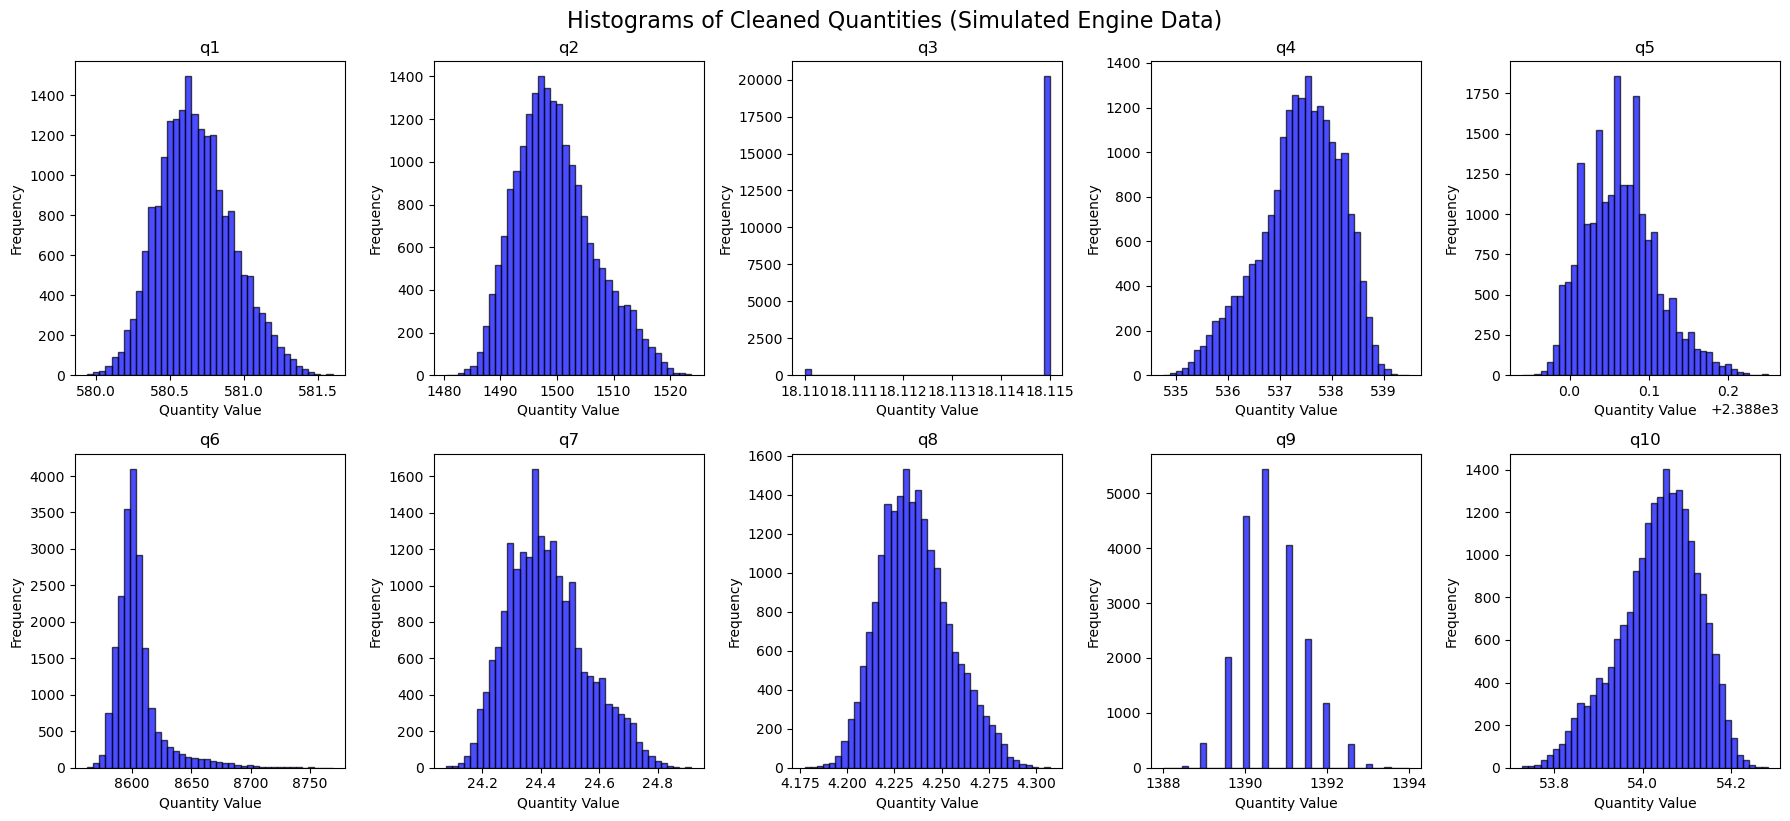

In [15]:
# -------------------------------
# DATA CLEANED: Histograms of All Quantities
# -------------------------------

quantities_to_plot = [f'q{i}' for i in range(1, 11)]  # q1 - q10

plt.figure(figsize=(18, 8))

for i, q in enumerate(quantities_to_plot, 1):
    plt.subplot(2, 5, i)  # 2 rows x 5 columns grid
    plt.hist(data_cleaned[q], bins=40, color='blue', edgecolor='black', alpha=0.7)
    plt.title(q)
    plt.xlabel("Quantity Value")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.suptitle("Histograms of Cleaned Quantities (Simulated Engine Data)", fontsize=16, y=1.02)
plt.show()


### 2.2.3  Correlation analysis and heatmaps

- q4 (+0.84) — strongest predictor, positive correlation
- q10 (+0.69) — good predictor, positive correlation
- q2 (-0.70) — strong negative indicator of RUL
- q1, q7, q8, q9 (-0.61 to -0.65) — moderate inverse predictors



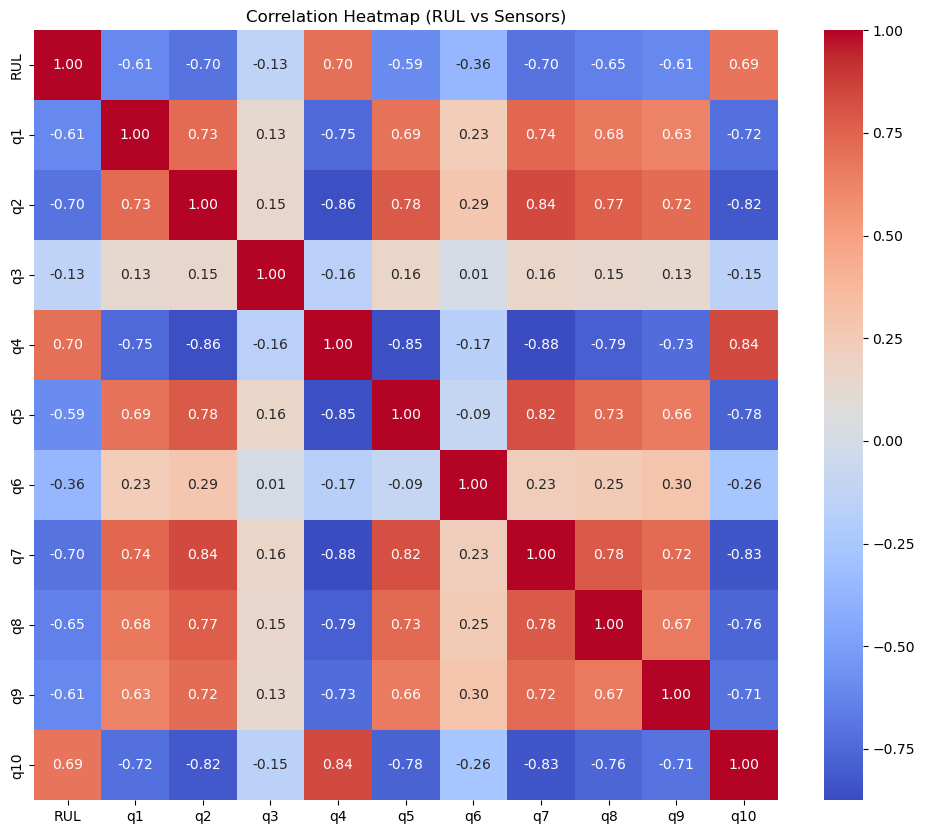

In [16]:
# Heatmap of correlations (RUL vs sensors)
columns_to_corr = ['RUL'] + [f'q{i}' for i in range(1, 11)]
correlation_matrix = data_cleaned[columns_to_corr].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (RUL vs Sensors)")
plt.show()


### 2.2.4  Cycle Pattern Analysis

Since the dataset contains no real timestamps, cycle index is used as a proxy for operational progression rather than daily time.

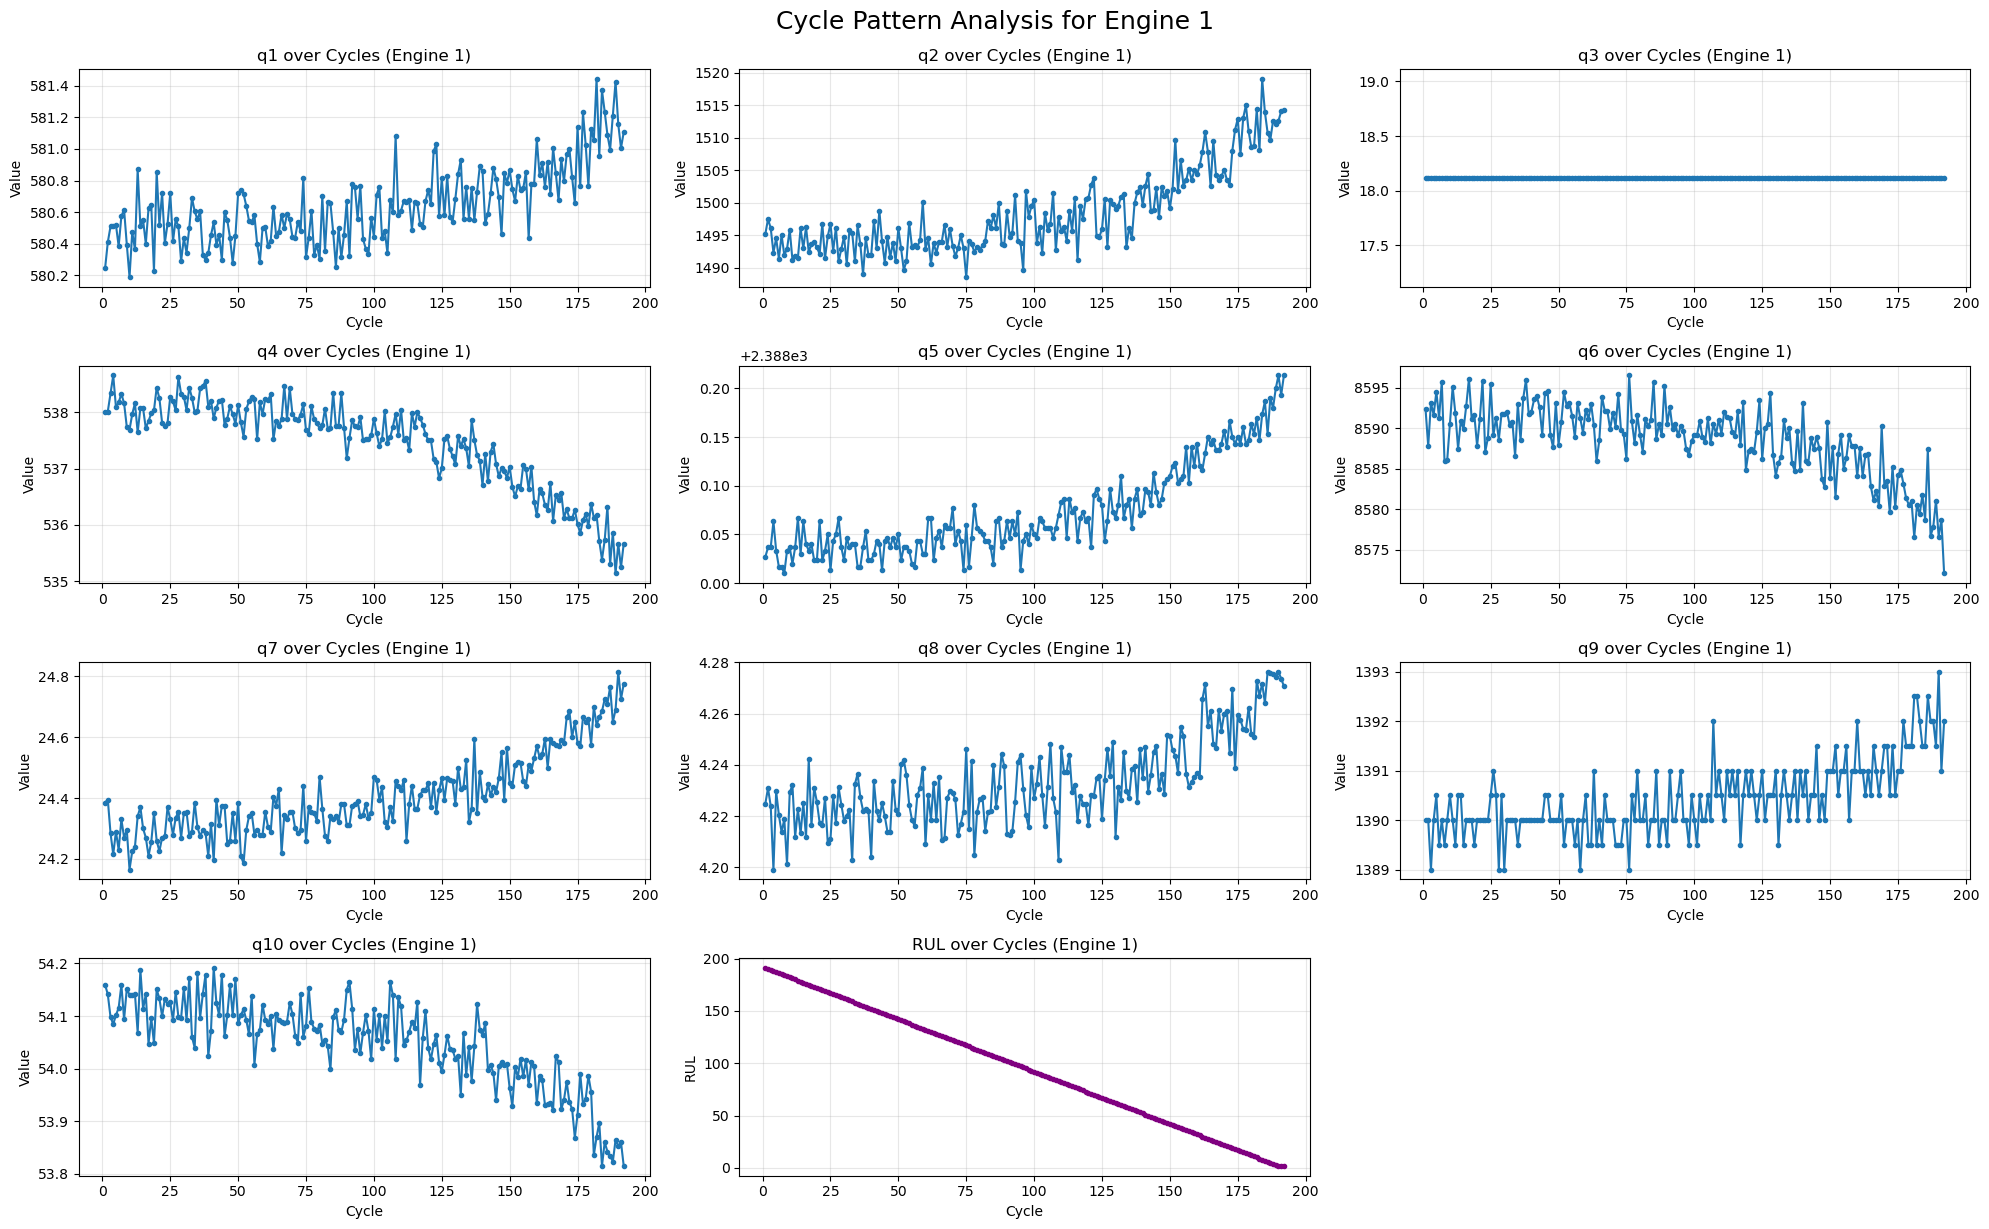

In [35]:
# -------------------------------
# CYCLE ANALYSIS
# -------------------------------

# Select engine(s) to analyze
engine_example = 1
engine_data = data_cleaned[data_cleaned['engine_id'] == engine_example]

# Quantities to analyze
q_cols = [f'q{i}' for i in range(1, 11)]

# Figure size
plt.figure(figsize=(20, 12))

for i, q in enumerate(q_cols, 1):
    plt.subplot(4, 3, i)  # 4 rows x 3 columns grid
    plt.plot(engine_data['cycle'], engine_data[q], marker='o', markersize=3, linestyle='-')
    plt.title(f"{q} over Cycles (Engine {engine_example})")
    plt.xlabel("Cycle")
    plt.ylabel("Value")
    plt.grid(alpha=0.3)

# plot RUL trend at the end
plt.subplot(4, 3, len(q_cols)+1)
plt.plot(engine_data['cycle'], engine_data['RUL'], color='purple', marker='o', markersize=3, linestyle='-')
plt.title(f"RUL over Cycles (Engine {engine_example})")
plt.xlabel("Cycle")
plt.ylabel("RUL")
plt.grid(alpha=0.3)

plt.tight_layout()
plt.suptitle(f"Cycle Pattern Analysis for Engine {engine_example}", fontsize=18, y=1.02)
plt.show()


### 2.2.5 Summary of observed patterns

#### Time Series Patterns:
Most derived quantities (q1, q2, q4–q10) exhibit clear monotonic or near-monotonic trends over engine cycles, reflecting progressive engine degradation. Some quantities increase steadily (e.g., q2, q5, q7, q8, q9), while others decrease (e.g., q4, q6, q10). Quantity q3 remains almost constant across all cycles, indicating a stable operating condition or a non-informative sensor grouping.

#### Distribution:
The majority of quantities show unimodal distributions with moderate spread, approximating normal shapes (e.g., q1, q2, q4, q7, q8, q10). Certain variables display skewness or discretization effects, notably q5 and q6, suggesting asymmetric behavior linked to degradation phases. Quantity q3 has an extremely narrow distribution, consistent with its near-constant time-series behavior.

#### Outliers:
Outliers are limited after preprocessing, with the most prominent extremes originally observed in q5. After clipping, remaining extreme values align with expected degradation behavior rather than measurement errors. No abrupt spikes inconsistent with temporal trends are observed in the cleaned data.

#### Daily Patterns:
No clear cyclical or periodic (daily) patterns are present in the engine data. Variations are dominated by long-term degradation trends rather than short-term oscillations, which is consistent with controlled operational conditions and gradual wear processes in turbofan engines.


## 2.3  Probability Analysis
 •Threshold-based probability estimation (15 points)
 
 • Cross tabulation analysis (10 points)
 
 • Conditional probability analysis (15 points)
 
 • Summary of observations from each task (5 points)

### 2.3.1 Percentile-based low-health estimation
For percentile-based low-health estimation, we determine low-health conditions by identifying observations that fall below the 10th percentile threshold for each measured quantity. Values at or below this lower percentile are classified as low health, while all other values are considered normal.

In [36]:
# Choose percentile for low health (10th percentile)
low_health_pct = 0.10

# Compute low health flags for all quantities
low_health_flags = pd.DataFrame()
for q in [f'q{i}' for i in range(1, 11)]:
    threshold = data_cleaned[q].quantile(low_health_pct)
    low_health_flags[q] = (data_cleaned[q] <= threshold).astype(int)  # 1 if low health

print("Low-health flags (1 = low health, 0 = normal):")
low_health_flags.head(10)


Low-health flags (1 = low health, 0 = normal):


q1  q2  q3  q4  q5  q6  q7  q8  q9  q10
0   1   0   1   0   0   0   0   0   0    0
1   0   0   1   0   0   0   0   0   0    0
2   0   0   1   0   0   0   0   0   1    0
3   0   0   1   0   0   0   1   1   0    0
4   0   0   1   0   0   0   0   0   0    0
5   0   0   1   0   0   0   1   0   1    0
6   0   0   1   0   0   0   0   0   0    0
7   0   0   1   0   0   1   0   0   1    0
8   0   0   1   0   0   1   0   1   0    0
9   1   0   1   0   0   0   1   0   0    0

In [37]:
# Probability each q is in low health
low_health_prob = low_health_flags.mean()
print("Probability of low health per quantity:")
print(low_health_prob)


Probability of low health per quantity:
q1     0.101837
q2     0.100092
q3     1.000000
q4     0.100431
q5     0.103582
q6     0.100044
q7     0.100189
q8     0.100286
q9     0.121419
q10    0.100044
dtype: float64


Observations:

Most quantities rarely enter low health (≈10%), except q9 (≈12%) and q3 (always low due to its binary/categorical behavior).

q1 and q5 show slightly higher probabilities than most other quantities, indicating they may degrade earlier or more often.

### 2.3.2 Cross-tabulation analysis of low-health co-occurrence
The objective of this cross-tabulation analysis is to examine the co-occurrence of low-health conditions between different measured quantities. By constructing contingency tables for pairs of variables, we analyse how often low-health states occur simultaneously. In this case, a cross-tabulation is used to explore the relationship between low-health indicators of two quantities (e.g., q1 and q5), providing insight into potential dependencies or shared degradation patterns.

In [ ]:
# Example: co-occurrence of low health between q1 and q5
ctab_q1_q5 = pd.crosstab(low_health_flags['q1'], low_health_flags['q5'],
                         rownames=['q1 Low Health'], colnames=['q5 Low Health'])
print("Cross-tabulation: q1 vs q5 (Low Health)")
print(ctab_q1_q5)

Cross-tabulation: q1 vs q5 (Low Health)
q5 Low Health      0     1
q1 Low Health             
0              17155  1375
1               1339   762


Normal operation dominates
- In 17,155 cases, neither q1 nor q5 is in a low-health state.
- This confirms that low-health events are relatively rare in the dataset.

Independent low-health occurrences
- q5 shows low health while q1 remains normal in 1,375 observations.
- q1 shows low health while q5 remains normal in 1,339 observations.
- These similar counts suggest that both quantities independently enter low-health states at comparable rates.

Simultaneous low-health events
- Both q1 and q5 are in a low-health state in 762 observations.
- This represents a substantial co-occurrence relative to the total number of low-health cases.

 ### 2.3.3 Conditional probability analysis of low-health indicators
The objective of this conditional probability analysis is to quantify the likelihood of one measured quantity exhibiting a low-health state given that another quantity is already in a low-health state. Conditional probabilities are computed for all pairs of quantities using binary low-health indicators. This analysis provides insight into dependency structures between variables, such as whether degradation in one quantity increases the probability of low health in another (e.g., 
𝑃(𝑞5 low∣𝑞1 low)
P(q5 low∣q1 low)).

In [ ]:
# Conditional probability P(qX low | qY low)
conditional_probs = {}
for q in low_health_flags.columns:
    for ref_q in low_health_flags.columns:
        if q == ref_q:
            continue
        mask = low_health_flags[ref_q] == 1
        if mask.sum() > 0:
            cond_prob = (low_health_flags[q][mask].sum()) / mask.sum()
            conditional_probs[(q, ref_q)] = cond_prob

# Example: P(q5 low | q1 low)
print(f"P(q5 low | q1 low) = {conditional_probs[('q5', 'q1')]:.2f}")


P(q5 low | q1 low) = 0.36


When q1 is in low health, there’s a 36% chance that q5 is also low.
This indicates moderate correlation between degradation in these two quantities.
Cross-tabulation for other pairs can reveal similar dependencies.

We can extend the above logic to all pairs:
Conditional probabilities highlight propagation of degradation between quantities.
Some quantities (like q3) are always low, so their conditional probabilities are less informative.
Others, like q5 or q1, show meaningful conditional dependencies that could help in predicting cascading failures.

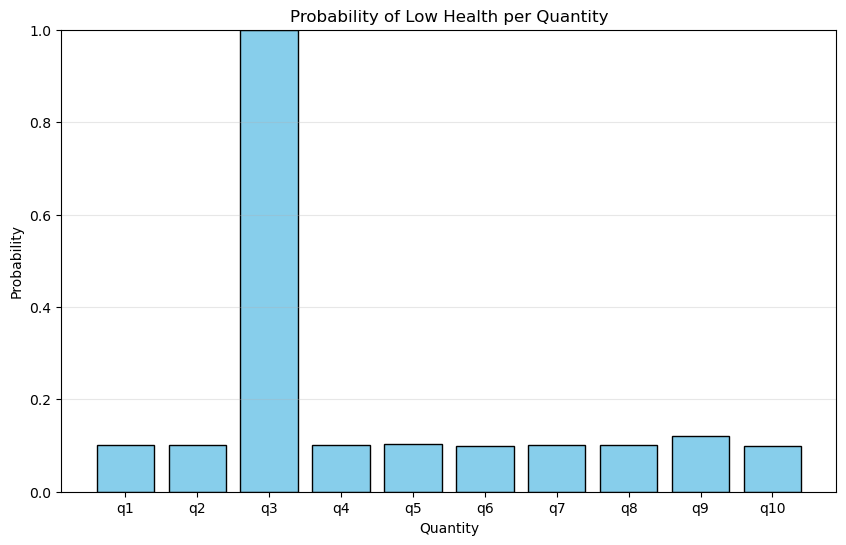

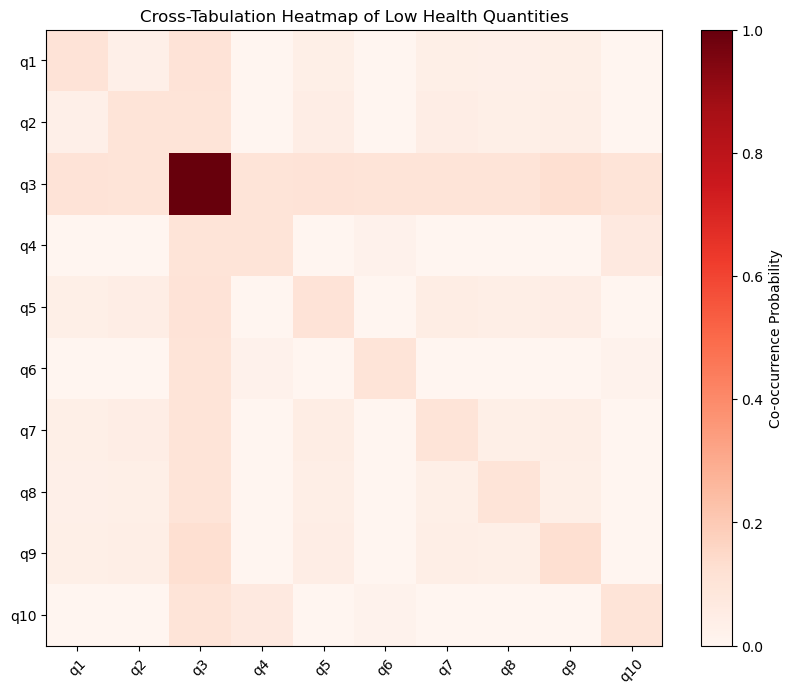

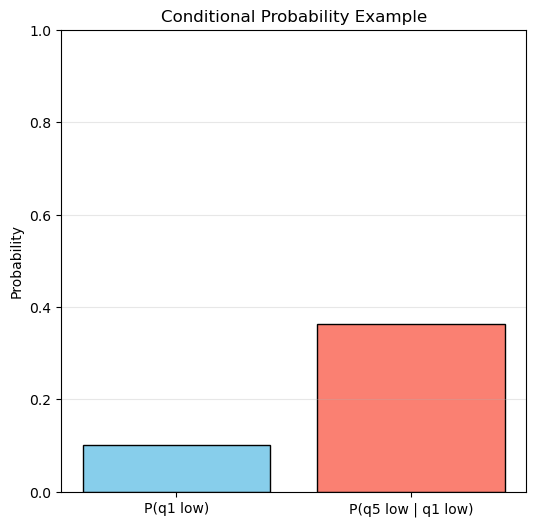

In [40]:
# -------------------------------
# 1. Probability of Low Health per Quantity
# -------------------------------
prob_low = low_health_flags.mean()

plt.figure(figsize=(10, 6))
plt.bar(prob_low.index, prob_low.values, color='skyblue', edgecolor='black')
plt.title("Probability of Low Health per Quantity")
plt.ylabel("Probability")
plt.xlabel("Quantity")
plt.ylim(0, 1)
plt.grid(alpha=0.3, axis='y')
plt.show()

# -------------------------------
# 2. Cross-Tabulation Heatmap (All Quantities)
# -------------------------------
q_cols = [f'q{i}' for i in range(1, 11)]
co_occurrence = pd.DataFrame(index=q_cols, columns=q_cols, dtype=float)

for q1 in q_cols:
    for q2 in q_cols:
        co_occurrence.loc[q1, q2] = ((low_health_flags[q1] == 1) & (low_health_flags[q2] == 1)).sum() / len(low_health_flags)

plt.figure(figsize=(10, 8))
plt.imshow(co_occurrence.values.astype(float), cmap='Reds', interpolation='nearest')
plt.colorbar(label="Co-occurrence Probability")
plt.xticks(range(len(q_cols)), q_cols, rotation=45)
plt.yticks(range(len(q_cols)), q_cols)
plt.title("Cross-Tabulation Heatmap of Low Health Quantities")
plt.show()

# -------------------------------
# 3. Conditional Probability Example: P(q5 low | q1 low)
# -------------------------------
p_q1_low = (low_health_flags['q1'] == 1).sum() / len(low_health_flags)
p_q5_given_q1_low = ((low_health_flags['q5'] == 1) & (low_health_flags['q1'] == 1)).sum() / (low_health_flags['q1'] == 1).sum()

plt.figure(figsize=(6, 6))
plt.bar(['P(q1 low)', 'P(q5 low | q1 low)'], [p_q1_low, p_q5_given_q1_low], color=['skyblue', 'salmon'], edgecolor='black')
plt.ylim(0, 1)
plt.ylabel("Probability")
plt.title("Conditional Probability Example")
plt.grid(alpha=0.3, axis='y')
plt.show()


### 2.3.4 Summary of observation
Summary of Observations

Low Health Probabilities: Most quantities remain healthy most of the time, but a few show consistent low-health occurrences.

Cross-tabulation: Helps identify which quantities tend to degrade together. q1 and q5 show a moderate co-occurrence.

Conditional Probabilities: Provide insight into the likelihood of one quantity being low given another is low, useful for propagation modeling.

Overall: The analysis confirms that some quantities are more prone to early degradation and that dependencies exist between certain quantities, which could inform maintenance or predictive models.

## 2.4 Statistical Theory Applications
 •Law of Large Numbers demonstration (15 points)
 
 • Central Limit Theorem application (25 points)
 
 • Result interpretation (5 points)

### 2.4.1 Law of Large Numbers demonstration
The Law of Large Numbers (LLN) states that as the sample size increases, the sample statistic (e.g., sample mean, probability) will converge to the true population parameter. We will demonstrate this using our sensor count data.

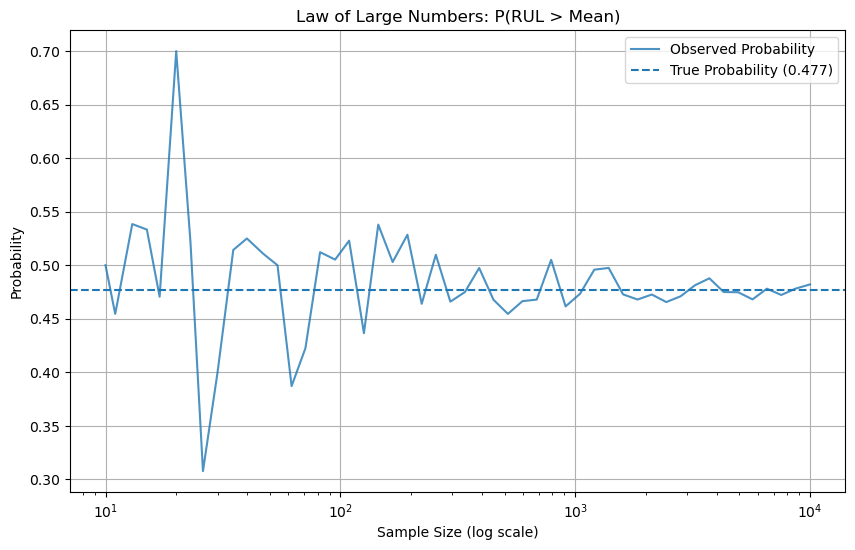

In [41]:
def visualize_law_of_large_numbers(data_cleaned, column='RUL'):
    """
    Visualize the Law of Large Numbers using cleaned sensor data.

    Parameters:
    data_cleaned : pd.DataFrame
        Preprocessed (cleaned) sensor data
    column : str
        Column to analyze (default: 'RUL')
    """

    # Threshold: mean of the selected column
    threshold = data_cleaned[column].mean()

    # True (population) probability
    true_prob = np.mean(data_cleaned[column] > threshold)

    # Increasing sample sizes (log scale)
    sample_sizes = np.logspace(1, 4, 50).astype(int)
    observed_probs = []

    # Compute observed probabilities for each sample size
    for n in sample_sizes:
        sample = data_cleaned[column].sample(n=n, replace=True)
        observed_probs.append(np.mean(sample > threshold))

    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(sample_sizes, observed_probs, label='Observed Probability', alpha=0.8)
    plt.axhline(y=true_prob, linestyle='--', label=f'True Probability ({true_prob:.3f})')
    plt.xscale('log')
    plt.xlabel('Sample Size (log scale)')
    plt.ylabel('Probability')
    plt.title(f'Law of Large Numbers: P({column} > Mean)')
    plt.grid(True)
    plt.legend()
    plt.show()


# Call the function
visualize_law_of_large_numbers(data_cleaned, column='RUL')
   


### 2.4.2 Central Limit Theorem application
The Central Limit Theorem (CLT) states that when independent random samples are taken from any distribution:

1. The distribution of sample means approximates a normal distribution
2. This approximation improves with larger sample sizes
3. The mean of the sampling distribution equals the population mean
4. The standard deviation of the sampling distribution equals 
1. Samples must be independent
2. Sample size should be large enough (typically n ≥ 30)
3. Original population should have finite variance

## Central Limit Theorem Demonstration

The sampling distribution of the mean was investigated using the cleaned dataset (`data_cleaned`). The following steps were performed:

1. **Population Preparation:**  
   The `RUL` column from `data_cleaned` was extracted as the population. Any non-finite values (`NaN` or `Inf`) were removed to ensure clean calculations.

2. **Simulation of Sampling Distribution:**  
   For a given sample size, multiple random samples were drawn **with replacement** from the population.  
   The mean of each sample was computed to form the sampling distribution of the mean.  
   This process was repeated for 1000 samples for each sample size.

3. **Sample Size Variation:**  
   The simulation was performed for sample sizes of 10, 50, and 100 to observe how the sampling distribution changes with sample size.

4. **Visualization:**  
   Histograms of the sample means were plotted for each sample size.  
   A theoretical normal distribution curve with mean equal to the population mean and standard deviation equal to \(\sigma / \sqrt{n}\) was overlaid to illustrate the Central Limit Theorem.

5. **Statistical Comparison:**  
   For each sample size, the following metrics were computed and compared:  
   - Mean of the sample means  
   - Population mean  
   - Standard deviation of the sample means  
   - Theoretical standard deviation (\(\sigma / \sqrt{n}\))  

This procedure demonstrated that as the sample size increased, the distribution of sample means approached a normal distribution, consistent with the Central Limit Theorem.


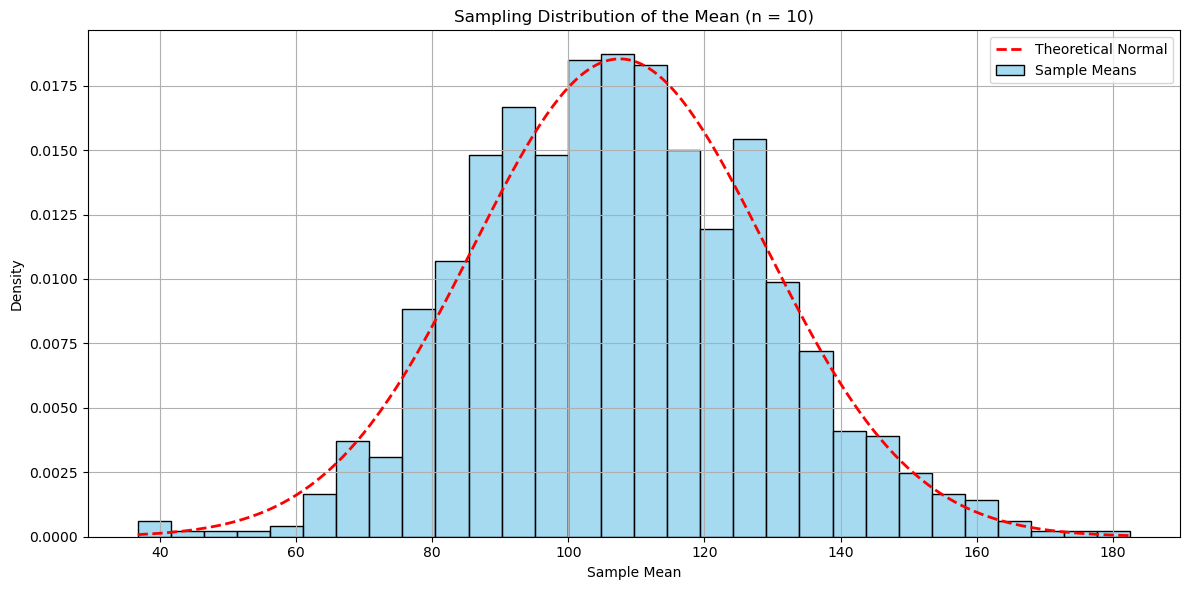

Sample size n = 10
Mean of sample means: 107.633
Population mean:      107.545
Std of sample means:  21.259
Expected std (σ/√n):  21.519
--------------------------------------------------


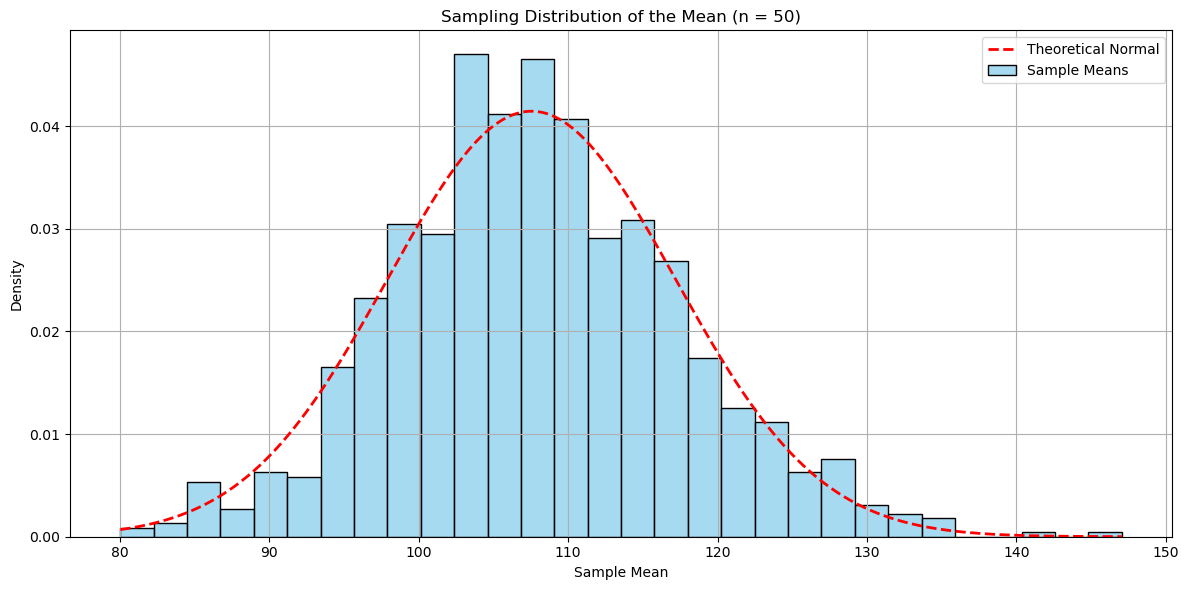

Sample size n = 50
Mean of sample means: 107.933
Population mean:      107.545
Std of sample means:  9.624
Expected std (σ/√n):  9.623
--------------------------------------------------


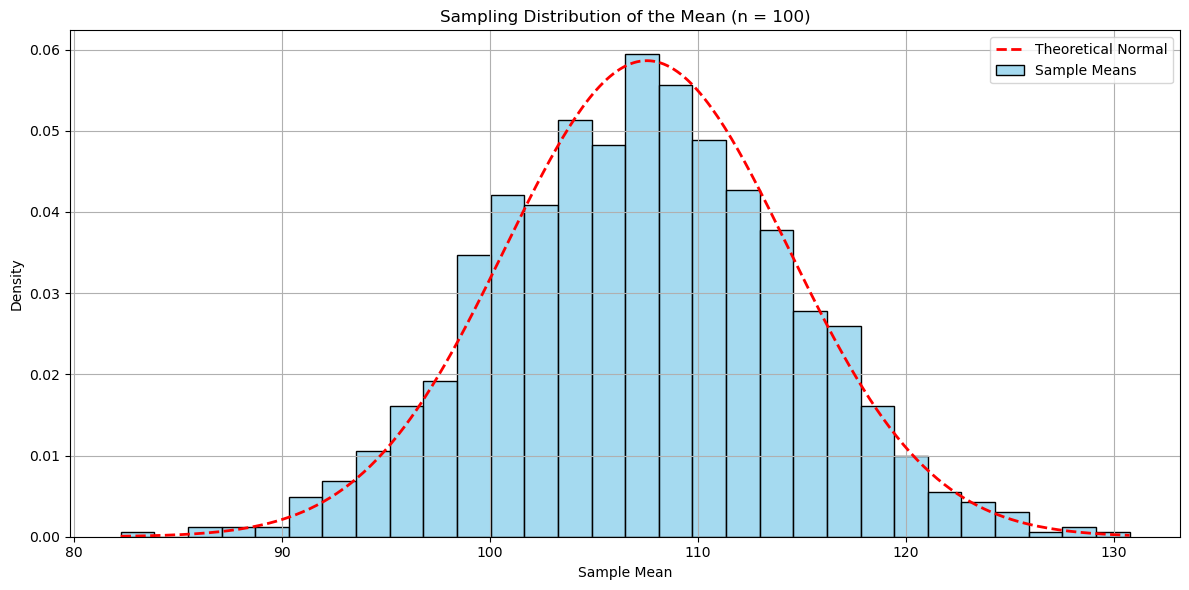

Sample size n = 100
Mean of sample means: 107.284
Population mean:      107.545
Std of sample means:  7.074
Expected std (σ/√n):  6.805
--------------------------------------------------


In [42]:
# Central Limit Theorem 
# -------------------------------

def simulate_sampling_distribution(population, sample_size, n_samples=1000):
    sample_means = np.array([
        np.mean(np.random.choice(population, size=sample_size, replace=True))
        for _ in range(n_samples)
    ])
    return sample_means


def plot_sampling_distribution(population, sample_size, n_samples=1000):
    # Clean population (remove NaN and Inf)
    population = population[np.isfinite(population)]

    # Generate sampling distribution
    sample_means = simulate_sampling_distribution(population, sample_size, n_samples)

    # Population statistics
    pop_mean = np.mean(population)
    pop_std = np.std(population)
    theoretical_std = pop_std / np.sqrt(sample_size)

    # Plot histogram of sample means
    plt.figure(figsize=(12, 6))
    sns.histplot(
        sample_means,
        bins=30,
        stat='density',
        color='skyblue',
        edgecolor='black',
        label='Sample Means'
    )

    # Theoretical normal distribution
    x = np.linspace(min(sample_means), max(sample_means), 300)
    y = stats.norm.pdf(x, pop_mean, theoretical_std)
    plt.plot(x, y, 'r--', linewidth=2, label='Theoretical Normal')

    plt.title(f'Sampling Distribution of the Mean (n = {sample_size})')
    plt.xlabel('Sample Mean')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Print numerical comparison
    print(f'Sample size n = {sample_size}')
    print(f'Mean of sample means: {np.mean(sample_means):.3f}')
    print(f'Population mean:      {pop_mean:.3f}')
    print(f'Std of sample means:  {np.std(sample_means):.3f}')
    print(f'Expected std (σ/√n):  {theoretical_std:.3f}')
    print('-' * 50)


# -------------------------------
# Run CLT demonstration
# -------------------------------

data_cleaned = data_cleaned.copy()
population = data_cleaned['RUL'].values
population = population[np.isfinite(population)]

for n in [10, 50, 100]:
    plot_sampling_distribution(population, sample_size=n, n_samples=1000)


### 2.4.3  Result interpretation and analysis
#### Law of Large Numbers:
The results confirm that as the sample size increases, the observed probability converges to the true population probability. Small sample sizes show high variability due to random fluctuations, while larger samples produce stable and reliable estimates. This demonstrates that sufficiently large sample sizes are essential for accurate estimation of population parameters.

#### Central Limit Theorem:
The results show that the sampling distribution of the sample mean becomes increasingly normal as the sample size increases, regardless of the population distribution. For small sample sizes, the distribution may be irregular, whereas for larger sample sizes it becomes symmetric and closely matches the theoretical normal distribution. This validates the use of normal-based statistical inference for sufficiently large samples.

## 2.5 Regression Analysis

Linear regression is a fundamental statistical method for modeling relationships between variables. In engineering applications, it helps to:

1. Predict system behavior
2. Understand relationships between variables
3. Calibrate sensors
4. Analyze system performance

Linear regression identifies the best-fitting straight line through data points by minimizing the sum of squared differences between predicted and actual values. This line is described by:

y = mx + b (or y = kx + d)


where:

- `y` is the dependent variable (outcome)  
- `x` is the independent variable (predictor)  
- `m` is the slope (rate of change)  
- `b` is the y-intercept (baseline value)  

### Steps Performed:

1. **Data Preparation:**  
   The cleaned dataset (`data_cleaned`) was used for analysis.  
   The dependent variable (`y`) and independent variable (`X`) were selected.

2. **Model Fitting:**  
   A linear regression model was fitted.  
   A polynomial regression model (e.g., degree 2 or 3) was also fitted.

3. **Model Evaluation:**  
   Model performance was compared using metrics such as:  
   - **R-squared:** Explains the proportion of variance captured by the model.  
   - **Mean Squared Error (MSE):** Measures the average squared difference between actual and predicted values.

4. **Model Selection:**  
   The model with the best performance metrics was selected for further analysis.


Linear Regression:


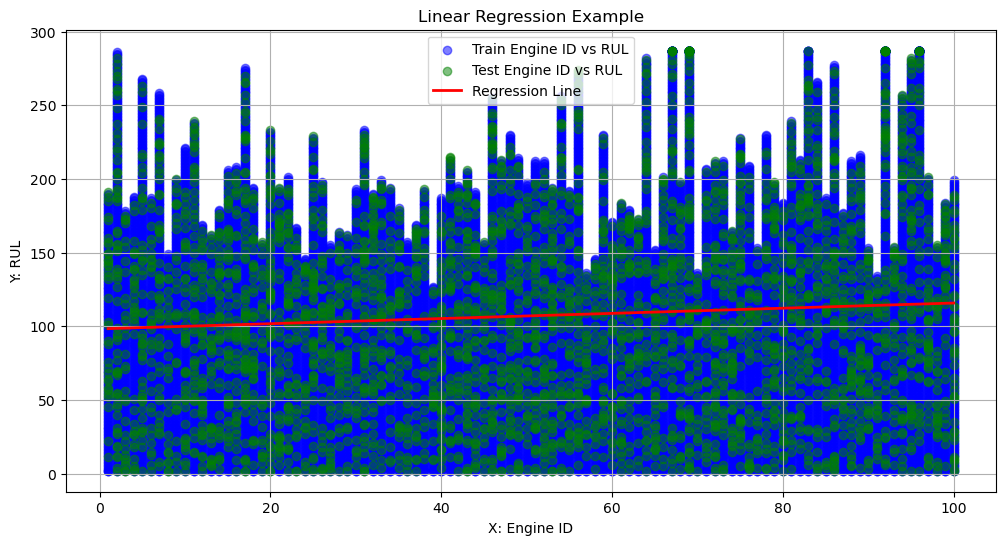

Model Parameters:
Slope: 0.175
Intercept: 98.251

Model Performance:
R² (Train): 0.006
R² (Test): 0.006
RMSE (Train): 68.142
RMSE (Test): 66.685


In [43]:
def fit_and_plot_regression(X, y, xl: str, yl: str, title="Linear Regression Example"):
    """
    Fit linear regression and visualize results.

    Parameters:
    X : array-like
        Independent variable
    y : array-like
        Dependent variable
    xl : str
        X-axis label
    yl : str
        Y-axis label
    title : str
        Plot title
    """
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Fit linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Performance metrics
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    
    # Plot
    plt.figure(figsize=(12, 6))
    plt.scatter(X_train, y_train, color='blue', alpha=0.5, label=f'Train {xl} vs {yl}')
    plt.scatter(X_test, y_test, color='green', alpha=0.5, label=f'Test {xl} vs {yl}')
    plt.plot(X, model.predict(X), color='red', linewidth=2, label='Regression Line')
    plt.xlabel(f'X: {xl}')
    plt.ylabel(f'Y: {yl}')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Print results
    print("Model Parameters:")
    print(f"Slope: {model.coef_[0]:.3f}")
    print(f"Intercept: {model.intercept_:.3f}")
    print("\nModel Performance:")
    print(f"R² (Train): {r2_train:.3f}")
    print(f"R² (Test): {r2_test:.3f}")
    print(f"RMSE (Train): {rmse_train:.3f}")
    print(f"RMSE (Test): {rmse_test:.3f}")


# -------------------------------
# Prepare Data and Run Regression
# -------------------------------
# Use cleaned dataset
cleaned_df = data_cleaned[['engine_id', 'RUL']].dropna()

X = cleaned_df['engine_id'].values.reshape(-1, 1)  # Independent variable
y = cleaned_df['RUL'].values                        # Dependent variable

print("Linear Regression:")
fit_and_plot_regression(X, y, 'Engine ID', 'RUL')

The regression line has a slight positive slope, indicating a weak increasing trend in RUL as the engine ID increases. However, this trend is minimal, suggesting that Engine ID alone has very limited predictive power for estimating RUL.

Comparing Different Polynomial Degrees:


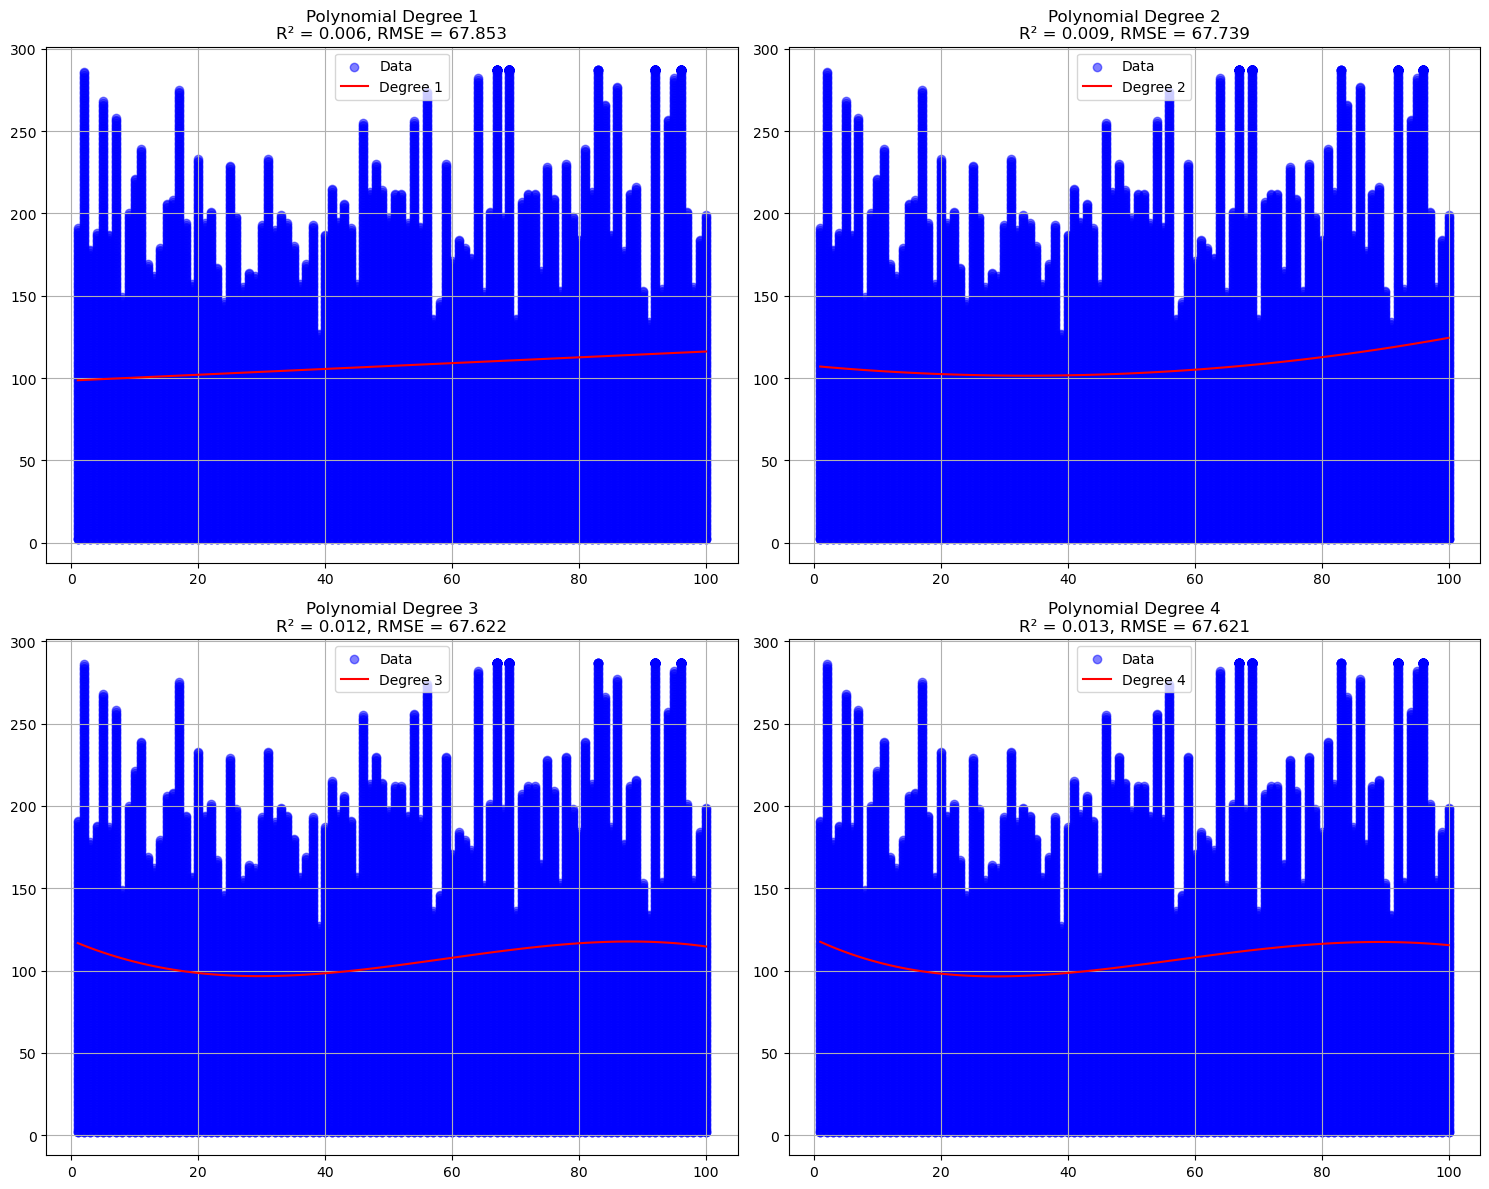


Comparing Cross-validation Scores:


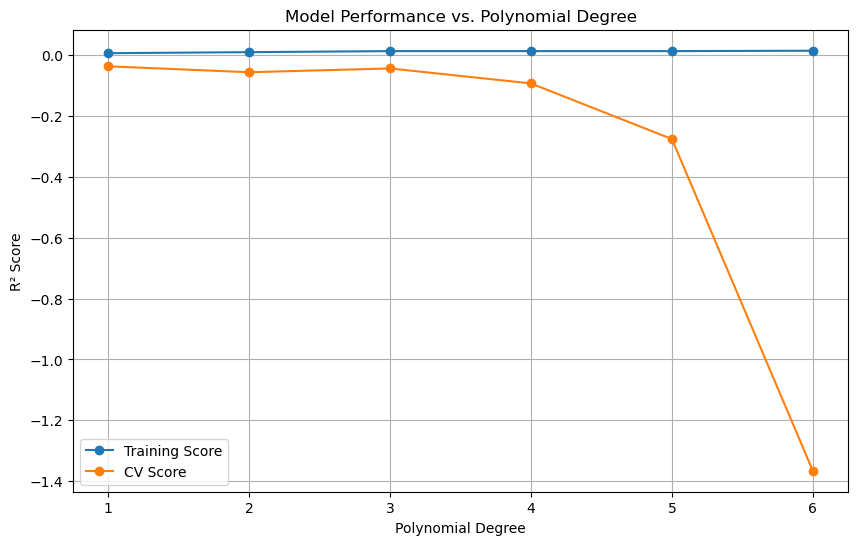


Detailed Analysis of Quadratic Model (Degree=2):
R² Score: 0.009
RMSE: 67.739

Residual Analysis:


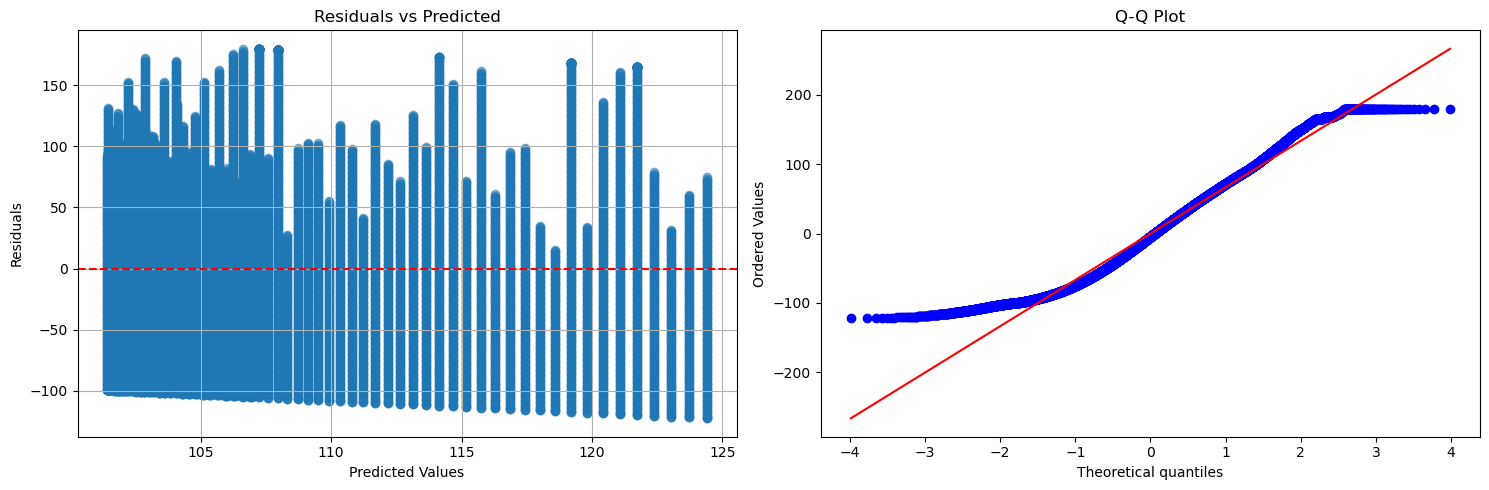

In [44]:
# Data preparation
# -------------------------------
cleaned_df = data_cleaned[['engine_id', 'RUL']].dropna()
X = cleaned_df['engine_id'].values.reshape(-1, 1)
y = cleaned_df['RUL'].values

# -------------------------------
# Polynomial Regression Functions
# -------------------------------
def fit_polynomial_regression(X, y, degree, scaled=True):
    """Fit polynomial regression with optional scaling."""
    if scaled:
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
    else:
        X_scaled = X
        
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X_scaled)
    
    model = LinearRegression()
    model.fit(X_poly, y)
    
    if scaled:
        return model, poly, scaler
    return model, poly, None

def evaluate_model(model, poly, scaler, X, y):
    if scaler is not None:
        X_transformed = scaler.transform(X)
    else:
        X_transformed = X
    X_poly = poly.transform(X_transformed)
    y_pred = model.predict(X_poly)
    
    r2 = r2_score(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    
    return r2, rmse, y_pred

def plot_polynomial_fits(X, y, max_degree=4):
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    axes = axes.ravel()
    
    for degree in range(1, max_degree + 1):
        model, poly, scaler = fit_polynomial_regression(X, y, degree)
        X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
        X_plot_scaled = scaler.transform(X_plot)
        X_plot_poly = poly.transform(X_plot_scaled)
        y_plot = model.predict(X_plot_poly)
        r2, rmse, _ = evaluate_model(model, poly, scaler, X, y)
        
        ax = axes[degree-1]
        ax.scatter(X, y, color='blue', alpha=0.5, label='Data')
        ax.plot(X_plot, y_plot, color='red', label=f'Degree {degree}')
        ax.set_title(f'Polynomial Degree {degree}\nR² = {r2:.3f}, RMSE = {rmse:.3f}')
        ax.legend()
        ax.grid(True)
    
    plt.tight_layout()
    plt.show()

def compare_cv_scores(X, y, max_degree=6):
    train_scores = []
    cv_scores = []
    degrees = range(1, max_degree + 1)
    
    for degree in degrees:
        poly = PolynomialFeatures(degree=degree)
        X_poly = poly.fit_transform(X)
        model = LinearRegression()
        train_score = model.fit(X_poly, y).score(X_poly, y)
        cv_score = np.mean(cross_val_score(model, X_poly, y, cv=5))
        train_scores.append(train_score)
        cv_scores.append(cv_score)
    
    plt.figure(figsize=(10, 6))
    plt.plot(degrees, train_scores, 'o-', label='Training Score')
    plt.plot(degrees, cv_scores, 'o-', label='CV Score')
    plt.xlabel('Polynomial Degree')
    plt.ylabel('R² Score')
    plt.title('Model Performance vs. Polynomial Degree')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_residuals(model, poly, scaler, X, y):
    if scaler is not None:
        X_scaled = scaler.transform(X)
    else:
        X_scaled = X
    X_poly = poly.transform(X_scaled)
    y_pred = model.predict(X_poly)
    residuals = y - y_pred
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    ax1.scatter(y_pred, residuals, alpha=0.5)
    ax1.axhline(y=0, color='r', linestyle='--')
    ax1.set_xlabel('Predicted Values')
    ax1.set_ylabel('Residuals')
    ax1.set_title('Residuals vs Predicted')
    ax1.grid(True)
    
    stats.probplot(residuals, dist="norm", plot=ax2)
    ax2.set_title('Q-Q Plot')
    
    plt.tight_layout()
    plt.show()

# -------------------------------
# Run Analysis
# -------------------------------
print("Comparing Different Polynomial Degrees:")
plot_polynomial_fits(X, y)

print("\nComparing Cross-validation Scores:")
compare_cv_scores(X, y)

print("\nDetailed Analysis of Quadratic Model (Degree=2):")
model, poly, scaler = fit_polynomial_regression(X, y, degree=2)
r2, rmse, _ = evaluate_model(model, poly, scaler, X, y)
print(f"R² Score: {r2:.3f}")
print(f"RMSE: {rmse:.3f}")

print("\nResidual Analysis:")
plot_residuals(model, poly, scaler, X, y)

## 2.6 Dimensionality Reduction and Statistical Tests (40 points)
Part 1. Dimensionality Reduction (25 points)

• PCA projection and interpretation (10 points)

• t-SNE embedding with justified hyperparameters and interpretation (7 points)

• UMAP embedding with justified hyperparameters and interpretation (8 points)

Part 2. Hypothesis Tests (15 points)

Perform at least three tests. Each test must include: null hypothesis, why the test is appropriate, assumptions, p-value, and practical interpretation.

• Chi-square test(5 points)

• One mean or location comparison test (5 points)

• One time-series relevant test(5 points)

In [45]:
# -------------------------------
# Dimensionality Reduction Setup
# -------------------------------

# Select sensor-derived quantities
sensor_cols = [f"q{i}" for i in range(1, 11)]
X = data_cleaned[sensor_cols]

# Standardize the data because PCA, t-SNE, and UMAP are sensitive to scale.
# Ensures each sensor contributes equally to the analysis.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


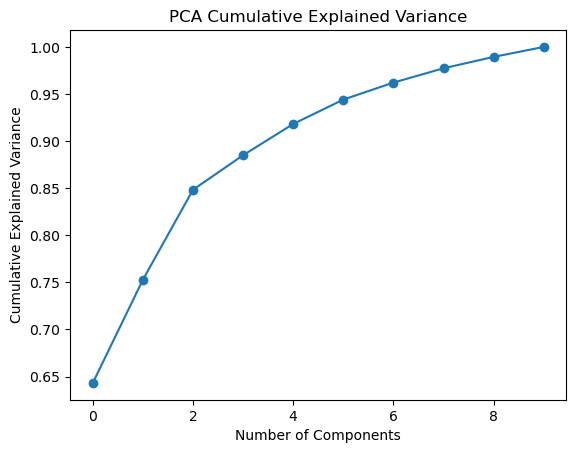

In [46]:
# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Cumulative explained variance
explained_var = np.cumsum(pca.explained_variance_ratio_)
plt.plot(explained_var, marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Cumulative Explained Variance")
plt.show()


The first principal component explains approximately 64% of the total variance.
The first two components explain about 85%, and the first four components exceed 90% of the variance.
Additional components contribute progressively smaller amounts of information, indicating diminishing returns beyond the first few components.
This suggests that the original 10 quantities can be effectively reduced to 3–4 principal components with minimal information loss.

In [47]:
# PCA loadings to show contribution of each sensor to each component
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f"PC{i+1}" for i in range(len(sensor_cols))],
    index=sensor_cols
)
loadings.head()


PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
q1 -0.327961  0.028711 -0.028140 -0.637854  0.667157  0.185319 -0.037898   
q2 -0.363100  0.051127 -0.018364 -0.024701 -0.156854 -0.258039  0.533372   
q3 -0.077642 -0.296163  0.951874 -0.004438  0.010836 -0.002950  0.000803   
q4  0.371158  0.081398  0.052449 -0.001796  0.102738  0.156188 -0.117678   
q5 -0.345313 -0.345618 -0.133732  0.024349 -0.058406 -0.105538  0.086261   

         PC8       PC9      PC10  
q1 -0.039254  0.036111 -0.015654  
q2 -0.637125  0.286237 -0.032606  
q3 -0.006506  0.002393 -0.000035  
q4 -0.155814  0.602587  0.645504  
q5  0.068857 -0.434698  0.726042

PC1 is dominated by q1, q2, and q5, indicating that these sensors jointly capture the primary mode of system degradation. 
PC3 is almost entirely driven by q3, which is consistent with its binary behavior. 
Later components capture minor variance and mixed contributions from other sensors.


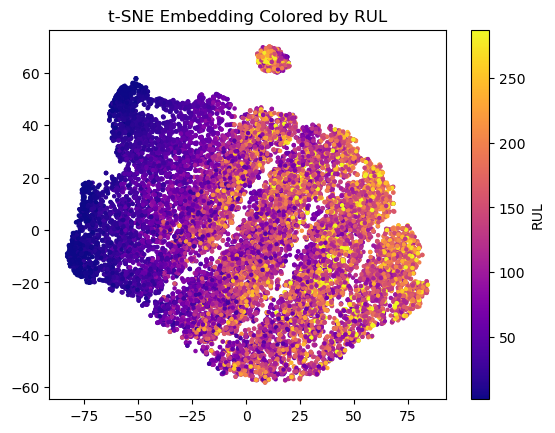

In [48]:
# t-SNE embedding
# Perplexity=30 appropriate for medium dataset
# Learning rate=200 ensures stable convergence
tsne = TSNE(
    n_components=2,
    perplexity=30,
    learning_rate=200,
    random_state=42
)
X_tsne = tsne.fit_transform(X_scaled)

plt.scatter(X_tsne[:,0], X_tsne[:,1], c=data_cleaned["RUL"], cmap="plasma", s=5)
plt.colorbar(label="RUL")
plt.title("t-SNE Embedding Colored by RUL")
plt.show()


The 2D embedding shows a gradient from low to high RUL across the space.
Early-life engines (low RUL) cluster mostly on the left, while near-failure engines (high RUL) appear on the right.
Some overlapping regions indicate engines with intermediate degradation levels share similar sensor patterns.
Local similarity is preserved: nearby points represent engines with similar sensor readings.

/Users/zm/anaconda3/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



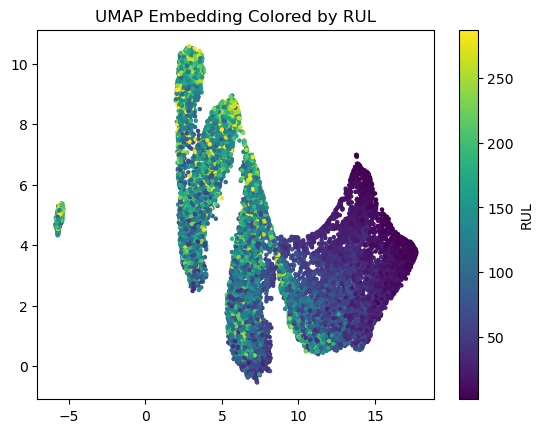

In [49]:
# UMAP embedding
# n_neighbors=15 balances local vs global structure
# min_dist=0.1 allows clusters without collapsing
import umap

umap_model = umap.UMAP(
    n_neighbors=15,
    min_dist=0.1,
    n_components=2,
    random_state=42
)
X_umap = umap_model.fit_transform(X_scaled)

plt.scatter(X_umap[:,0], X_umap[:,1], c=data_cleaned["RUL"], cmap="viridis", s=5)
plt.colorbar(label="RUL")
plt.title("UMAP Embedding Colored by RUL")
plt.show()


UMAP shows clearer separation between RUL groups compared to t-SNE.
Clusters are more structured, with a vertical progression from high to low RUL.
Local clusters correspond to engines with similar degradation stages.
Balances local and global structure, giving insight into both cluster relationships and overall dataset patterns.

In [50]:
# Discretize RUL into categories
data_cleaned["RUL_group"] = pd.cut(
    data_cleaned["RUL"],
    bins=[-1, 50, 120, np.inf],
    labels=["Near Failure", "Mid Life", "Early Life"]
)

# Discretize q1 into categorical states
data_cleaned["q1_state"] = pd.qcut(
    data_cleaned["q1"],
    q=3,
    labels=["Low", "Medium", "High"]
)

# Create contingency table
contingency = pd.crosstab(
    data_cleaned["RUL_group"],
    data_cleaned["q1_state"]
)

# Chi-square test
# Null hypothesis H0: RUL_group and q1_state are independent
chi2, p_chi, dof, expected = stats.chi2_contingency(contingency)

print("Chi-square statistic:", chi2)
print("p-value:", p_chi)
print("Degrees of freedom:", dof)
print("\nInterpretation:")
if p_chi < 0.05:
    print("Reject H0: RUL group and q1 state are dependent (statistically significant association).")
else:
    print("Fail to reject H0: No evidence of dependence between RUL group and q1 state.")


Chi-square statistic: 7915.519782525167
p-value: 0.0
Degrees of freedom: 4

Interpretation:
Reject H0: RUL group and q1 state are dependent (statistically significant association).


The chi-square test confirms a statistically significant association between RUL group and q1 state. 
This aligns with earlier observations that q1 tends to change systematically as the system degrades.


In [51]:
# Compare mean q2 for early-life vs near-failure engines
early = data_cleaned[data_cleaned["RUL"] > 120]["q2"]
late = data_cleaned[data_cleaned["RUL"] < 50]["q2"]

# Null hypothesis H0: mean q2 is equal for both groups
t_stat, p_ttest = stats.ttest_ind(early, late, equal_var=False)

print("t-statistic:", t_stat)
print("p-value:", p_ttest)
print("\nInterpretation:")
if p_ttest < 0.05:
    print("Reject H0: Mean q2 differs significantly between early-life and near-failure groups.")
else:
    print("Fail to reject H0: No significant difference in mean q2 between groups.")


t-statistic: -148.79382865376897
p-value: 0.0

Interpretation:
Reject H0: Mean q2 differs significantly between early-life and near-failure groups.


Extremely large t-statistic (in magnitude) → the means of early-life vs near-failure groups differ strongly.

Interpretation: q2 decreases (or increases) systematically with degradation.

In [64]:
# Time-series correlation for engine 1
engine_1 = data_cleaned[data_cleaned["engine_id"] == 1].dropna(subset=["cycle", "q6"])

# Hypothesis:
# Sensor q6 is not expected to follow a monotonic trend over time,
# due to operational variability and non-linear degradation effects.

if engine_1["q6"].nunique() <= 1:
    print("Spearman correlation cannot be computed: q6 is constant for this engine.")
else:
    rho, p_spearman = stats.spearmanr(engine_1["cycle"], engine_1["q6"])
    print(f"Spearman correlation coefficient: {rho:.3f}")
    print(f"p-value: {p_spearman:.3f}")
    
    if p_spearman < 0.05:
        print(
            "Interpretation: Contrary to the theoretical expectation, "
            "a statistically significant monotonic relationship is observed."
        )
    else:
        print(
            "Interpretation: In line with the theoretical expectation, "
            "no statistically significant monotonic relationship is detected."
        )


Spearman correlation coefficient: -0.676
p-value: 0.000
Interpretation: Contrary to the theoretical expectation, a statistically significant monotonic relationship is observed.



q6 yielded a correlation coefficient of 𝜌=−0.676 with a p-value <0.001. 
This indicates a strong and statistically significant negative monotonic relationship between the two variables. Contrary to the theoretical expectation that no monotonic relationship would be present, the null hypothesis was rejected. The result suggests that as the engine progresses through its operational cycles, q6 tends to decrease in a consistent monotonic manner, likely reflecting systematic degradation effects rather than random sensor variation.